Parable of Google Flu (Replication Code).do

In [47]:
cd /Users/datalab/github/Replicate-Google-flu-study/GFT2.0/parable/

/Users/datalab/github/Replicate-Google-flu-study/GFT2.0/parable


In [48]:
* Open file
/* 
Note: Replication file has already created all necessary variables, so you can skip directly to
creating the charts and viewing the results. If you would like to begin from scratch, you can run:
keep date gflu source1 cflu source2
As noted below, we also recommend keeping the time variables: sweek, swweekly, and week.
*/

use "ParableOfGFT(Replication).dta", clear
*insheet using "ParableOfGFT(Replication).csv",clear

In [49]:
sort date


In [50]:
des


Contains data from ParableOfGFT(Replication).dta
  obs:           519                          
 vars:           132                          11 Mar 2014 11:45
 size:       279,741                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
date            str10   %10s                  
gflu            float   %9.0g                 Google Flu
source1         str10   %10s                  Source1
cflu            float   %9.0g                 CDC % ILI
source2         str3    %9s                   Source2
dif             float   %9.0g                 Difference Between Google Flu and
                                                CDC
pdif            float   %9.0g                 Proportional Difference Between
                                                Go

In [51]:
* Create difference between GFT estimate and CDC estimate
* gen dif = gflu-cflu
label variable dif "Difference Between Google Flu and CDC"
* Create proportional difference between GFT and CDC estimate
* gen pdif = (gflu-cflu)/cflu
label variable pdif "Proportional Difference Between Google Flu and CDC"

In [52]:
* Set up dates in Stata date format -- weekly data
* gen sweek = date(date, "YMD")
format sweek %d
label variable sweek "Date in Stata format"
* Convert date format to weekly
* gen swweekly = wofd(sweek)
format swweekly %tw
label variable swweekly "Date in week of year format"
* Pull out number of week for seasonality analysis
* gen week = week(sweek)
label variable week "Number of the week in the year"
/* 
Note: week variable has to be manually corrected to deal with 52 week base year in Stata.
Two years in this data had 53 weeks. This is done to allow for autocorrelation diagnostics 
and does not affect our results beyond marginally weakening the estimated seasonal effects.
For easiest replication, if starting from scratch, we argue for keeping the week variables
as currently formatted.
*/

In [53]:
* Generate two and three week lag of CDC flu data as baseline for comparison
* gen lcflu = cflu[_n-2]
label variable lcflu "2-week lag of CDC flu data"
* gen lcflu3 = cflu[_n-3]
label variable lcflu3 "3-week lag of CDC flu data"
* gen lcflu4 = cflu[_n-4]
label variable lcflu4 "4-week lag of CDC flu data"
* gen lcflu5 = cflu[_n-5]
label variable lcflu5 "5-week lag of CDC flu data"

In [54]:
* Generate two and three week lag of difference between GFT and CDC data
* gen dif_2 = dif[_n-2]
label variable dif_2 "2-week lag of difference between GFT and CDC data"
* gen dif_3 = dif[_n-3]
label variable dif_3 "3-week lag of difference between GFT and CDC data"

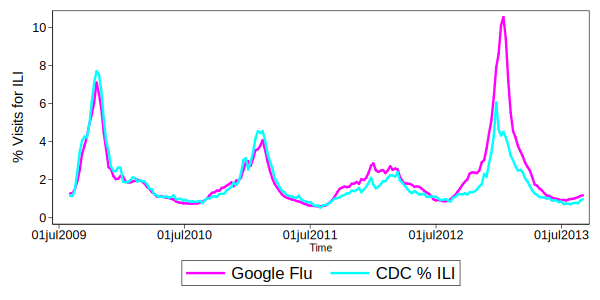

In [107]:
* Generation of chart comparing GFT to CDC data
twoway (line gflu sweek, lcolor(magenta) lwidth(thick)) ///
(line cflu sweek, lcolor(cyan) lwidth(thick)) ///
if _n >= 306, ytitle(% Visits for ILI, size(large)) xtitle(Time) ///
scheme(s1color) xsize(10) ysize(5) xlabel(#6, labsize(medlarge)) ///
ylabel(,labsize(medlarge) angle(horizontal)) legend(size(vlarge))


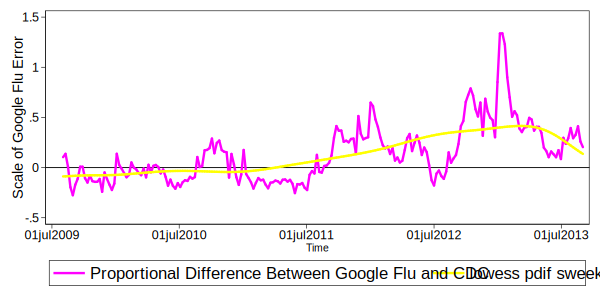

In [108]:
* Generation of chart plotting proportional error (GFT-CDC)/CDC for GFT over period analyzed
* with LOESS smoothing line to show trend.
twoway (line pdif sweek, lcolor(magenta) lwidth(thick)) ///
(lowess pdif sweek, bwidth(0.5) lwidth(thick) lcolor(yellow)) ///
if _n >= 306, ytitle(Scale of Google Flu Error, size(large)) ///
yline(0, lcolor(black)) xtitle(Time) ///
scheme(s1color) xsize(10) ysize(5) xlabel(#6, labsize(medlarge)) ///
ylabel(,labsize(medlarge) angle(horizontal)) legend(size(vlarge))

In [92]:
*** Alternative models, labeled according to SM part 7

* Calculate RMSE for GFT versus CDC in out-of-sample period
* Out-of-sample starts September 2009, when update was released
* gen dif2 = dif*dif
sum dif2 if _n >= 311
display sqrt(r(mean))
* Calculate mean absolute error for GFT versus CDC in out-of-sample period
* gen absdif = abs(dif)
sum absdif if _n >= 311



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        dif2 |        209    .8863024    4.104458   2.29e-06    36.4856

.94143633


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      absdif |        209    .4856101    .8084631   .0015146   6.040331


## Equation 2

In [94]:
* Equation 2
* Dynamic prediction with lag-only model -- starting in September 2009
* Only using one of the lag terms and removing seasonality

drop s3dlscflu09
reg cflu lcflu if _n < 311
predict s3dlscflu09





      Source |       SS           df       MS      Number of obs   =       308
-------------+----------------------------------   F(1, 306)       =    796.83
       Model |  334.865104         1  334.865104   Prob > F        =    0.0000
    Residual |  128.595627       306  .420247146   R-squared       =    0.7225
-------------+----------------------------------   Adj R-squared   =    0.7216
       Total |  463.460731       307  1.50964408   Root MSE        =    .64826

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8523804   .0301961    28.23   0.000     .7929621    .9117986
       _cons |   .2595517    .062561     4.15   0.000     .1364476    .3826559
------------------------------------------------------------------------------

(option xb assumed; fitted values)
(2 missing v

In [95]:
forvalues i = 312/519 {
	reg cflu lcflu if _n < `i'
	predict tdlscflu09
	replace s3dlscflu09 = tdlscflu09 if _n == `i'
	drop tdlscflu09
}



      Source |       SS           df       MS      Number of obs   =       309
-------------+----------------------------------   F(1, 307)       =    786.41
       Model |  337.354781         1  337.354781   Prob > F        =    0.0000
    Residual |  131.696654       307  .428979327   R-squared       =    0.7192
-------------+----------------------------------   Adj R-squared   =    0.7183
       Total |  469.051435       308  1.52289427   Root MSE        =    .65497

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8550798   .0304917    28.04   0.000     .7950806    .9150789
       _cons |   .2607431   .0632061     4.13   0.000     .1363712     .385115
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing val

(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       317
-------------+----------------------------------   F(1, 315)       =   1010.74
       Model |  481.923648         1  481.923648   Prob > F        =    0.0000
    Residual |  150.192466       315  .476801478   R-squared       =    0.7624
-------------+----------------------------------   Adj R-squared   =    0.7616
       Total |  632.116113       316  2.00036745   Root MSE        =    .69051

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .9144336   .0287628    31.79   0.000      .857842    .9710252
       _cons |   .1897627   .0638594     2.97   0.003     .0641179    .3154075
--------------------------------------------

------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       325
-------------+----------------------------------   F(1, 323)       =    983.95
       Model |  492.548147         1  492.548147   Prob > F        =    0.0000
    Residual |  161.687773       323  .500581339   R-squared       =    0.7529
-------------+----------------------------------   Adj R-squared   =    0.7521
       Total |  654.235919       324  2.01924666   Root MSE        =    .70752

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8674969   .0276555    31.37   0.000     .8130893    .9219045
       _cons |   .2523699   .0639746     3.9

       _cons |   .2521777   .0633281     3.98   0.000     .1276001    .3767554
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       333
-------------+----------------------------------   F(1, 331)       =   1000.82
       Model |  491.778123         1  491.778123   Prob > F        =    0.0000
    Residual |  162.645756       331  .491376908   R-squared       =    0.7515
-------------+----------------------------------   Adj R-squared   =    0.7507
       Total |  654.423879       332  1.97115626   Root MSE        =    .70098

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8658525   .0273695    31.6

       lcflu |    .866172   .0271205    31.94   0.000     .8128258    .9195181
       _cons |   .2467714    .062381     3.96   0.000     .1240675    .3694754
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       341
-------------+----------------------------------   F(1, 339)       =   1023.81
       Model |  492.834189         1  492.834189   Prob > F        =    0.0000
    Residual |  163.185344       339  .481372697   R-squared       =    0.7512
-------------+----------------------------------   Adj R-squared   =    0.7505
       Total |  656.019534       340  1.92946922   Root MSE        =    .69381

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+------------------------------

-------------+----------------------------------------------------------------
       lcflu |   .8672243   .0267375    32.43   0.000     .8146358    .9198128
       _cons |   .2419228   .0609591     3.97   0.000     .1220257    .3618199
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       349
-------------+----------------------------------   F(1, 347)       =   1055.86
       Model |   497.13373         1   497.13373   Prob > F        =    0.0000
    Residual |  163.378568       347  .470831609   R-squared       =    0.7526
-------------+----------------------------------   Adj R-squared   =    0.7519
       Total |  660.512299       348  1.89802385   Root MSE        =    .68617

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t

        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8689018    .026339    32.99   0.000     .8171012    .9207025
       _cons |   .2350515    .059495     3.95   0.000     .1180435    .3520595
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       357
-------------+----------------------------------   F(1, 355)       =   1093.15
       Model |  503.684065         1  503.684065   Prob > F        =    0.0000
    Residual |  163.570901       355  .460763103   R-squared       =    0.7549
-------------+----------------------------------   Adj R-squared   =    0.7542
       Total |  667.254967       356   1.8743117   Root MSE        =     .6788

--------------------------------------------


------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8694352   .0259277    33.53   0.000     .8184474    .9204229
       _cons |   .2330026   .0580209     4.02   0.000     .1189022    .3471029
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       365
-------------+----------------------------------   F(1, 363)       =   1128.48
       Model |  508.745044         1  508.745044   Prob > F        =    0.0000
    Residual |  163.648286       363  .450821725   R-squared       =    0.7566
-------------+----------------------------------   Adj R-squared   =    0.7559
       Total |   672.39333       364  1.8472

       Total |  673.418283       371  1.81514362   Root MSE        =    .66537

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8690755   .0256155    33.93   0.000     .8187052    .9194457
       _cons |   .2354466   .0569014     4.14   0.000     .1235558    .3473374
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       373
-------------+----------------------------------   F(1, 371)       =   1154.14
       Model |  509.606152         1  509.606152   Prob > F        =    0.0000
    Residual |  163.814183       371  .441547664   R-squared       =    0.7567
-------------+------------------------------

-------------+----------------------------------   Adj R-squared   =    0.7538
       Total |  681.782432       379  1.79889824   Root MSE        =    .66547

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8703026   .0255362    34.08   0.000     .8200918    .9205133
       _cons |   .2421736   .0567852     4.26   0.000     .1305191    .3538281
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       381
-------------+----------------------------------   F(1, 379)       =   1159.77
       Model |  518.092872         1  518.092872   Prob > F        =    0.0000
    Residual |  169.306582       379  .44671

    Residual |  173.153343       386  .448583791   R-squared       =    0.7592
-------------+----------------------------------   Adj R-squared   =    0.7586
       Total |  719.088836       387  1.85811069   Root MSE        =    .66976

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8715982   .0249843    34.89   0.000     .8224759    .9207206
       _cons |   .2434333   .0568126     4.28   0.000     .1317325    .3551341
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       389
-------------+----------------------------------   F(1, 387)       =   1215.00
       Model |  545.427445         1  545.42

       Model |  546.148169         1  546.148169   Prob > F        =    0.0000
    Residual |   174.81334       394   .44368868   R-squared       =    0.7575
-------------+----------------------------------   Adj R-squared   =    0.7569
       Total |  720.961509       395  1.82521901   Root MSE        =     .6661

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8700175   .0247977    35.08   0.000     .8212651    .9187699
       _cons |   .2378798    .056252     4.23   0.000     .1272881    .3484715
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       397
-------------+------------------------------

-------------+----------------------------------   F(1, 402)       =   1266.83
       Model |  551.901737         1  551.901737   Prob > F        =    0.0000
    Residual |  175.133929       402   .43565654   R-squared       =    0.7591
-------------+----------------------------------   Adj R-squared   =    0.7585
       Total |  727.035666       403  1.80405873   Root MSE        =    .66004

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8715657   .0244873    35.59   0.000     .8234265    .9197049
       _cons |   .2314602   .0551111     4.20   0.000     .1231181    .3398022
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       M


      Source |       SS           df       MS      Number of obs   =       412
-------------+----------------------------------   F(1, 410)       =   1313.32
       Model |  561.924935         1  561.924935   Prob > F        =    0.0000
    Residual |  175.424558       410  .427864776   R-squared       =    0.7621
-------------+----------------------------------   Adj R-squared   =    0.7615
       Total |  737.349493       411  1.79403769   Root MSE        =    .65411

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8734158    .024101    36.24   0.000     .8260388    .9207927
       _cons |   .2250423   .0537617     4.19   0.000     .1193594    .3307252
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing valu

(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       420
-------------+----------------------------------   F(1, 418)       =   1347.38
       Model |  565.511131         1  565.511131   Prob > F        =    0.0000
    Residual |  175.440039       418  .419713012   R-squared       =    0.7632
-------------+----------------------------------   Adj R-squared   =    0.7627
       Total |   740.95117       419  1.76837988   Root MSE        =    .64785

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8731152   .0237863    36.71   0.000     .8263595    .9198709
       _cons |   .2261941   .0526543     4.30   0.000     .1226939    .3296943
--------------------------------------------

------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       428
-------------+----------------------------------   F(1, 426)       =   1372.64
       Model |  565.978856         1  565.978856   Prob > F        =    0.0000
    Residual |  175.652118       426  .412328916   R-squared       =    0.7632
-------------+----------------------------------   Adj R-squared   =    0.7626
       Total |  741.630974       427  1.73684069   Root MSE        =    .64213

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8728229   .0235585    37.05   0.000     .8265175    .9191283
       _cons |   .2279044   .0518592     4.3

       _cons |   .2294368   .0513717     4.47   0.000     .1284679    .3304057
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       436
-------------+----------------------------------   F(1, 434)       =   1392.43
       Model |  565.661518         1  565.661518   Prob > F        =    0.0000
    Residual |  176.308936       434  .406241789   R-squared       =    0.7624
-------------+----------------------------------   Adj R-squared   =    0.7618
       Total |  741.970454       435  1.70567921   Root MSE        =    .63737

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |    .872444   .0233804    37.3

       lcflu |   .8721624    .023209    37.58   0.000     .8265484    .9177764
       _cons |   .2298752   .0509104     4.52   0.000      .129818    .3299324
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       444
-------------+----------------------------------   F(1, 442)       =   1414.53
       Model |   566.13654         1   566.13654   Prob > F        =    0.0000
    Residual |  176.901945       442  .400230644   R-squared       =    0.7619
-------------+----------------------------------   Adj R-squared   =    0.7614
       Total |  743.038485       443  1.67728778   Root MSE        =    .63264

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+------------------------------

-------------+----------------------------------------------------------------
       lcflu |   .8725123    .023007    37.92   0.000     .8272974    .9177271
       _cons |    .226209   .0502213     4.50   0.000     .1275111     .324907
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       452
-------------+----------------------------------   F(1, 450)       =   1442.12
       Model |   567.82817         1   567.82817   Prob > F        =    0.0000
    Residual |  177.185865       450  .393746366   R-squared       =    0.7622
-------------+----------------------------------   Adj R-squared   =    0.7616
       Total |  745.014034       451  1.65191582   Root MSE        =    .62749

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t

        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8735598    .022771    38.36   0.000     .8288109    .9183086
       _cons |   .2215742   .0493881     4.49   0.000     .1245182    .3186303
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       460
-------------+----------------------------------   F(1, 458)       =   1476.45
       Model |  571.854816         1  571.854816   Prob > F        =    0.0000
    Residual |  177.391943       458  .387318652   R-squared       =    0.7632
-------------+----------------------------------   Adj R-squared   =    0.7627
       Total |  749.246759       459  1.63234588   Root MSE        =    .62235

--------------------------------------------


------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8737021   .0225123    38.81   0.000     .8294637    .9179405
       _cons |   .2209901   .0484975     4.56   0.000     .1256887    .3162914
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       468
-------------+----------------------------------   F(1, 466)       =   1509.98
       Model |  575.135176         1  575.135176   Prob > F        =    0.0000
    Residual |  177.494527       466  .380889542   R-squared       =    0.7642
-------------+----------------------------------   Adj R-squared   =    0.7637
       Total |  752.629702       467  1.6116

       Total |  753.413461       474  1.58947987   Root MSE        =     .6128

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8735044   .0223077    39.16   0.000       .82967    .9173388
       _cons |   .2223915   .0478034     4.65   0.000     .1284583    .3163248
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       476
-------------+----------------------------------   F(1, 474)       =   1532.73
       Model |  575.701572         1  575.701572   Prob > F        =    0.0000
    Residual |  178.037335       474  .375606191   R-squared       =    0.7638
-------------+------------------------------

-------------+----------------------------------   Adj R-squared   =    0.7580
       Total |  798.083651       482  1.65577521   Root MSE        =    .63307

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8784198   .0226028    38.86   0.000     .8340074    .9228323
       _cons |   .2280205   .0490257     4.65   0.000     .1316894    .3243515
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       484
-------------+----------------------------------   F(1, 482)       =   1531.88
       Model |  612.790675         1  612.790675   Prob > F        =    0.0000
    Residual |  192.811975       482  .40002

    Residual |  194.035995       489  .396801626   R-squared       =    0.7637
-------------+----------------------------------   Adj R-squared   =    0.7632
       Total |  821.173081       490  1.67586343   Root MSE        =    .62992

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8736946   .0219768    39.76   0.000     .8305139    .9168753
       _cons |   .2322207   .0485113     4.79   0.000     .1369044     .327537
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       492
-------------+----------------------------------   F(1, 490)       =   1584.62
       Model |    627.4961         1    627.

       Model |  627.882018         1  627.882018   Prob > F        =    0.0000
    Residual |  195.005583       497  .392365358   R-squared       =    0.7630
-------------+----------------------------------   Adj R-squared   =    0.7625
       Total |  822.887601       498  1.65238474   Root MSE        =    .62639

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8732139   .0218287    40.00   0.000     .8303261    .9161017
       _cons |   .2278923   .0481211     4.74   0.000     .1333465    .3224381
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       500
-------------+------------------------------

-------------+----------------------------------   F(1, 505)       =   1637.54
       Model |  633.085147         1  633.085147   Prob > F        =    0.0000
    Residual |  195.236691       505  .386607309   R-squared       =    0.7643
-------------+----------------------------------   Adj R-squared   =    0.7638
       Total |  828.321838       506  1.63699968   Root MSE        =    .62178

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8744079   .0216082    40.47   0.000     .8319549    .9168608
       _cons |   .2231399   .0473419     4.71   0.000     .1301286    .3161513
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing values generated)
(1 real change made)

      Source |       SS           df       M


      Source |       SS           df       MS      Number of obs   =       515
-------------+----------------------------------   F(1, 513)       =   1682.84
       Model |  641.085413         1  641.085413   Prob > F        =    0.0000
    Residual |   195.42927       513  .380953743   R-squared       =    0.7664
-------------+----------------------------------   Adj R-squared   =    0.7659
       Total |  836.514683       514  1.62746047   Root MSE        =    .61721

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   .8757621   .0213483    41.02   0.000     .8338211     .917703
       _cons |   .2184716   .0464549     4.70   0.000     .1272063    .3097368
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(2 missing valu

In [98]:
label variable s3dlscflu09 "Lags and Seasonality"
* Calculate error relative to CDC data
*gen s3difdcflu09 = s3dlscflu09-cflu
label variable s3difdcflu09 "Lag Model Error"
* Calculate out-of-sample RMSE
*gen s3difdcflu092 = s3difdcflu09 * s3difdcflu09
sum s3difdcflu092 if _n >= 311
display sqrt(r(mean))
*Calculate out-of-sample mean absolute error
*gen s3adifdcflu09 = abs(s3difdcflu09)
sum s3adifdcflu09 if _n >= 311





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
s3difdcf~092 |        209    .3253719    .9904649   6.70e-06   8.048721

.57041382


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
s3adifdcf~09 |        209    .3378641      .46069   .0025884   2.837027


## Equation 6 -- Presented in main paper

In [100]:
* Equation 6 -- Presented in main paper
* Dynamic prediction with lag-only model -- starting in September 2009
reg cflu lcflu lcflu3 lcflu4 b52.week if _n < 311
drop dlscflu09
predict dlscflu09



      Source |       SS           df       MS      Number of obs   =       306
-------------+----------------------------------   F(54, 251)      =     33.06
       Model |  406.079928        54  7.51999867   Prob > F        =    0.0000
    Residual |  57.0890679       251  .227446486   R-squared       =    0.8767
-------------+----------------------------------   Adj R-squared   =    0.8502
       Total |  463.168996       305  1.51858687   Root MSE        =    .47691

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.494005   .1076626    13.88   0.000     1.281968    1.706042
      lcflu3 |  -.5686854   .1775467    -3.20   0.002    -.9183567   -.2190142
      lcflu4 |  -.1887746    .107917    -1.75   0.081    -.4013128    .0237636
             |
        week |
          1  |   -1

In [101]:
forvalues i = 312/519 {
	reg cflu lcflu lcflu3 lcflu4 b52.week if _n < `i'
	predict tdlscflu09
	replace dlscflu09 = tdlscflu09 if _n == `i'
	drop tdlscflu09
}



      Source |       SS           df       MS      Number of obs   =       307
-------------+----------------------------------   F(54, 252)      =     32.79
       Model |  410.352496        54  7.59912029   Prob > F        =    0.0000
    Residual |  58.3953642       252  .231727636   R-squared       =    0.8754
-------------+----------------------------------   Adj R-squared   =    0.8487
       Total |   468.74786       306  1.53185575   Root MSE        =    .48138

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.536755   .1071691    14.34   0.000     1.325694    1.747817
      lcflu3 |  -.6153595   .1781285    -3.45   0.001    -.9661697   -.2645494
      lcflu4 |  -.1769986   .1088149    -1.63   0.105    -.3913012    .0373039
             |
        week |
          1  |  -1.

         26  |  -.5478647    .285848    -1.92   0.056    -1.110809      .01508
         27  |  -.5669315   .2857618    -1.98   0.048    -1.129706   -.0041566
         28  |  -.5098591   .2861953    -1.78   0.076    -1.073488    .0537695
         29  |  -.5594354   .2865713    -1.95   0.052    -1.123805    .0049338
         30  |   -.565804   .2864556    -1.98   0.049    -1.129945   -.0016627
         31  |  -.5557742   .2866925    -1.94   0.054    -1.120382    .0088337
         32  |  -.5474689   .2868677    -1.91   0.057    -1.112422    .0174839
         33  |  -.5418135   .2869418    -1.89   0.060    -1.106912    .0232852
         34  |  -.4741873   .2869405    -1.65   0.100    -1.039284     .090909
         35  |  -.3250424   .2868702    -1.13   0.258    -.8900001    .2399154
         36  |    -.16013   .2864086    -0.56   0.577    -.7241788    .4039188
         37  |  -.2694996   .2853615    -0.94   0.346    -.8314862     .292487
         38  |  -.4657106   .2837426    -1.64   0.10

-------------+----------------------------------------------------------------
       lcflu |   1.558267   .1062678    14.66   0.000     1.348993    1.767541
      lcflu3 |  -.6029977   .1783407    -3.38   0.001    -.9542059   -.2517895
      lcflu4 |  -.1922281   .1086394    -1.77   0.078    -.4061729    .0217168
             |
        week |
          1  |   -1.03231   .2816251    -3.67   0.000    -1.586917   -.4777022
          2  |  -.8827504   .2812003    -3.14   0.002    -1.436521   -.3289797
          3  |   .2037148   .2886136     0.71   0.481     -.364655    .7720847
          4  |    .810105   .2932418     2.76   0.006     .2326208    1.387589
          5  |   .6947039   .2883444     2.41   0.017     .1268642    1.262544
          6  |    .389197   .2822605     1.38   0.169    -.1666615    .9450556
          7  |   .2801222   .2798818     1.00   0.318    -.2710519    .8312963
          8  |  -.3018906   .2802068    -1.08   0.282    -.8537047    .2499236
          9  |   -.829

         34  |  -.3810234   .2976757    -1.28   0.202    -.9672285    .2051816
         35  |  -.2319018   .2976079    -0.78   0.437    -.8179733    .3541697
         36  |  -.0685663   .2971812    -0.23   0.818    -.6537975    .5166649
         37  |  -.1829845   .2962388    -0.62   0.537    -.7663599    .4003909
         38  |  -.3885548   .2947814    -1.32   0.189    -.9690601    .1919505
         39  |  -.3589664   .2935544    -1.22   0.223    -.9370553    .2191226
         40  |  -.1263893   .2930701    -0.43   0.667    -.7035246     .450746
         41  |   .1480632   .2930027     0.51   0.614    -.4289394    .7250658
         42  |  -.4158645   .3095312    -1.34   0.180    -1.025416    .1936872
         43  |  -.2758925   .2945155    -0.94   0.350    -.8558741    .3040891
         44  |  -.1082031   .2942284    -0.37   0.713    -.6876194    .4712131
         45  |  -.1608853   .2937923    -0.55   0.584    -.7394429    .4176722
         46  |  -.1652084   .2928878    -0.56   0.57

          5  |   .6688203   .3120036     2.14   0.033     .0544224    1.283218
          6  |   .3587923   .3053935     1.17   0.241    -.2425889    .9601736
          7  |   .2432508    .302819     0.80   0.423    -.3530609    .8395625
          8  |  -.3710807   .3030177    -1.22   0.222    -.9677835    .2256221
          9  |  -.9251383   .3038107    -3.05   0.003    -1.523403   -.3268739
         10  |  -.3354363   .3082693    -1.09   0.278    -.9424807    .2716081
         11  |  -.2609193   .3138397    -0.83   0.407    -.8789328    .3570942
         12  |  -.5002383   .3132253    -1.60   0.111    -1.117042    .1165654
         13  |  -.4024601   .3095927    -1.30   0.195     -1.01211    .2071903
         14  |   -.536973   .3111794    -1.73   0.086    -1.149748    .0758019
         15  |  -.3822704   .3098421    -1.23   0.218     -.992412    .2278711
         16  |  -.2701616   .3107065    -0.87   0.385    -.8820053    .3416821
         17  |  -.4067631   .3108621    -1.31   0.19

         43  |  -.0172498   .2922145    -0.06   0.953    -.5926685    .5581688
         44  |  -.0186147   .2914648    -0.06   0.949    -.5925573    .5553278
         45  |  -.0956632     .30515    -0.31   0.754     -.696554    .5052277
         46  |  -.1115546   .3044294    -0.37   0.714    -.7110264    .4879172
         47  |   .2262494   .3034364     0.75   0.457    -.3712671    .8237659
         48  |   .0320507   .3038835     0.11   0.916    -.5663462    .6304476
         49  |   .0228979   .3031216     0.08   0.940    -.5739988    .6197946
         50  |   .3419746   .3017864     1.13   0.258    -.2522928    .9362421
         51  |   .1724672   .3047705     0.57   0.572    -.4276763    .7726106
             |
       _cons |   .4623084   .2297895     2.01   0.045     .0098149    .9148019
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS       

         14  |  -.5448806   .3138266    -1.74   0.084    -1.162835    .0730736
         15  |  -.4007997   .3122656    -1.28   0.200     -1.01568    .2140808
         16  |  -.3006808   .3127936    -0.96   0.337     -.916601    .3152394
         17  |    -.45192   .3127123    -1.45   0.150     -1.06768    .1638401
         18  |   -.053572   .3101639    -0.17   0.863    -.6643142    .5571702
         19  |   -.181462   .3109467    -0.58   0.560    -.7937455    .4308216
         20  |  -.6746265    .310056    -2.18   0.030    -1.285156   -.0640969
         21  |   -.409691   .3085219    -1.33   0.185      -1.0172    .1978178
         22  |  -.2189106   .3095474    -0.71   0.480    -.8284387    .3906176
         23  |  -.3971597   .3098356    -1.28   0.201    -1.007255    .2129359
         24  |  -.5866684   .3090311    -1.90   0.059     -1.19518    .0218432
         25  |  -.3872757   .3091643    -1.25   0.211    -.9960495     .221498
         26  |  -.4447976   .3101677    -1.43   0.15

             |
       _cons |   .6060278   .2302904     2.63   0.009     .1525723    1.059483
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       318
-------------+----------------------------------   F(54, 263)      =     37.91
       Model |  576.783493        54  10.6811758   Prob > F        =    0.0000
    Residual |  74.1002893       263  .281750149   R-squared       =    0.8862
-------------+----------------------------------   Adj R-squared   =    0.8628
       Total |  650.883782       317  2.05326114   Root MSE        =     .5308

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.726891   .

         23  |  -.4146881   .3109697    -1.33   0.184    -1.026985    .1976083
         24  |  -.6067297   .3101184    -1.96   0.051     -1.21735    .0038906
         25  |  -.4050909   .3103175    -1.31   0.193    -1.016103    .2059212
         26  |  -.4624976   .3113045    -1.49   0.139    -1.075453    .1504581
         27  |  -.4781416   .3110541    -1.54   0.125    -1.090604     .134321
         28  |  -.4100486   .3112364    -1.32   0.189     -1.02287    .2027729
         29  |  -.4692237   .3115653    -1.51   0.133    -1.082693    .1442454
         30  |  -.4679217   .3112891    -1.50   0.134    -1.080847    .1450036
         31  |  -.4575558   .3114446    -1.47   0.143    -1.070787    .1556756
         32  |  -.4480419   .3115316    -1.44   0.152    -1.061445    .1653609
         33  |  -.4435491   .3115598    -1.42   0.156    -1.057007    .1699091
         34  |  -.3743941   .3115101    -1.20   0.230    -.9877545    .2389664
         35  |  -.2279804   .3114615    -0.73   0.46

       Total |   652.40706       320  2.03877206   Root MSE        =    .52933

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.708218   .1078743    15.84   0.000     1.495822    1.920615
      lcflu3 |  -.7910917   .1867137    -4.24   0.000    -1.158716    -.423467
      lcflu4 |  -.1209036   .1096318    -1.10   0.271      -.33676    .0949529
             |
        week |
          1  |  -1.082392   .3082283    -3.51   0.001     -1.68927   -.4755147
          2  |  -.8508614    .307699    -2.77   0.006    -1.456697   -.2450259
          3  |   .2716903   .3134698     0.87   0.387    -.3455074     .888888
          4  |   .8263558   .3178624     2.60   0.010     .2005093    1.452202
          5  |   .6662285   .3146822     2.12   0.035     .0466437    1.285813
          6  |   .345

         31  |  -.5106938   .2990864    -1.71   0.089    -1.099562     .078174
         32  |  -.5012698   .2991973    -1.68   0.095    -1.090356    .0878163
         33  |  -.4966796   .2992235    -1.66   0.098    -1.085817    .0924582
         34  |  -.4277748   .2992578    -1.43   0.154     -1.01698    .1614306
         35  |  -.2811526   .2991886    -0.94   0.348    -.8702216    .3079165
         36  |  -.1243195   .2988817    -0.42   0.678    -.7127844    .4641453
         37  |  -.2501616   .2983085    -0.84   0.402    -.8374978    .3371747
         38  |  -.4614066   .2975676    -1.55   0.122    -1.047284    .1244707
         39  |  -.4056879   .2972166    -1.36   0.173    -.9908742    .1794984
         40  |  -.1794198   .2963643    -0.61   0.545    -.7629281    .4040885
         41  |    .102723   .2963237     0.35   0.729    -.4807054    .6861514
         42  |  -.0822126   .2965266    -0.28   0.782    -.6660404    .5016151
         43  |  -.1252157   .2840331    -0.44   0.66

          2  |   -.922247   .2856874    -3.23   0.001    -1.484715   -.3597794
          3  |   .2078161   .3023118     0.69   0.492     -.387382    .8030141
          4  |    .756837   .3038832     2.49   0.013      .158545    1.355129
          5  |   .6041844   .3013047     2.01   0.046     .0109692      1.1974
          6  |   .2933529   .2977916     0.99   0.325    -.2929458    .8796517
          7  |   .1975738   .2967702     0.67   0.506    -.3867139    .7818614
          8  |  -.3910936   .2967654    -1.32   0.189    -.9753718    .1931847
          9  |  -.9221563   .2968873    -3.11   0.002    -1.506675    -.337638
         10  |  -.3165487    .300611    -1.05   0.293    -.9083981    .2753008
         11  |  -.2488861   .3012298    -0.83   0.409    -.8419539    .3441817
         12  |  -.5096958   .3009105    -1.69   0.091    -1.102135    .0827434
         13  |  -.4299048    .299276    -1.44   0.152    -1.019126    .1593164
         14  |  -.5831519   .3000652    -1.94   0.05

         40  |   -.181736   .2990441    -0.61   0.544    -.7704907    .4070187
         41  |   .0987518   .2990018     0.33   0.741    -.4899196    .6874233
         42  |  -.0808337   .2991884    -0.27   0.787    -.6698726    .5082052
         43  |  -.1232444   .2866013    -0.43   0.668    -.6875018    .4410131
         44  |   -.111151   .2860276    -0.39   0.698     -.674279    .4519771
         45  |  -.3053937   .2856357    -1.07   0.286    -.8677501    .2569628
         46  |  -.3972338   .2853812    -1.39   0.165    -.9590891    .1646215
         47  |  -.0635994   .2858304    -0.22   0.824    -.6263391    .4991402
         48  |  -.0482182    .286132    -0.17   0.866    -.6115517    .5151153
         49  |  -.0585357   .2861928    -0.20   0.838     -.621989    .5049176
         50  |   .1740019   .2855307     0.61   0.543    -.3881477    .7361516
         51  |   .1543323    .286579     0.54   0.591    -.4098814    .7185459
             |
       _cons |    .662781    .214999 

         11  |  -.2557233   .3025099    -0.85   0.399    -.8512818    .3398351
         12  |  -.5158943   .3021673    -1.71   0.089    -1.110778    .0789897
         13  |  -.4350396   .3005649    -1.45   0.149    -1.026769    .1566896
         14  |  -.5885157   .3013441    -1.95   0.052    -1.181779    .0047476
         15  |    -.45242   .3009409    -1.50   0.134     -1.04489    .1400495
         16  |  -.3588005   .3017896    -1.19   0.236     -.952941      .23534
         17  |  -.5134086   .3016832    -1.70   0.090     -1.10734    .0805224
         18  |  -.1233834   .3009422    -0.41   0.682    -.7158554    .4690886
         19  |  -.2519724   .3011678    -0.84   0.404    -.8448885    .3409438
         20  |  -.7455344   .3005447    -2.48   0.014    -1.337224   -.1538448
         21  |  -.4863401    .300891    -1.62   0.107    -1.078711    .1060311
         22  |  -.2919645   .3006324    -0.97   0.332    -.8838268    .2998977
         23  |  -.4703492   .3006295    -1.56   0.11

         49  |  -.0594822   .2857802    -0.21   0.835    -.6220953    .5031308
         50  |   .1755963   .2851352     0.62   0.539    -.3857469    .7369396
         51  |   .1520112   .2861505     0.53   0.596    -.4113308    .7153533
             |
       _cons |   .6583896   .2146717     3.07   0.002     .2357673    1.081012
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       329
-------------+----------------------------------   F(54, 274)      =     37.66
       Model |  576.185339        54  10.6700989   Prob > F        =    0.0000
    Residual |  77.6412655       274  .283362283   R-squared       =    0.8813
-------------+----------------------------------   Adj R-squared   =    0.8578
       Total |  653.826605       328  1.99337379   Root MSE        =    .53232

-----------------------------

         20  |  -.7424625   .2994145    -2.48   0.014    -1.331898   -.1530267
         21  |  -.4821936   .2997517    -1.61   0.109    -1.072293     .107906
         22  |  -.2869821   .2994789    -0.96   0.339    -.8765446    .3025804
         23  |  -.4658054   .2994815    -1.56   0.121    -1.055373    .1237622
         24  |  -.6570196   .2990311    -2.20   0.029    -1.245701   -.0683387
         25  |  -.4595405   .2999131    -1.53   0.127    -1.049958    .1308767
         26  |  -.5146437   .2998995    -1.72   0.087    -1.105034    .0757469
         27  |   -.530268   .2999188    -1.77   0.078    -1.120696    .0601604
         28  |   -.463224   .3003184    -1.54   0.124    -1.054439    .1279911
         29  |  -.5209616   .3003611    -1.73   0.084    -1.112261    .0703376
         30  |  -.5203206   .3004359    -1.73   0.084    -1.111767    .0711259
         31  |  -.5098634    .300556    -1.70   0.091    -1.101546    .0818195
         32  |  -.5003482   .3006669    -1.66   0.09

       Model |  575.859338        54  10.6640618   Prob > F        =    0.0000
    Residual |  77.9931763       277  .281563813   R-squared       =    0.8807
-------------+----------------------------------   Adj R-squared   =    0.8575
       Total |  653.852514       331  1.97538524   Root MSE        =    .53063

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |    1.70183   .1057482    16.09   0.000     1.493658    1.910002
      lcflu3 |  -.8064302   .1813912    -4.45   0.000    -1.163511   -.4493499
      lcflu4 |  -.0989738   .1060312    -0.93   0.351    -.3077032    .1097555
             |
        week |
          1  |  -.9655679   .2850485    -3.39   0.001    -1.526704   -.4044315
          2  |  -.9215791   .2853963    -3.23   0.001      -1.4834    -.359758
          3  |   .052

         28  |  -.4685993   .2992784    -1.57   0.119    -1.057739    .1205405
         29  |  -.5262996   .2993141    -1.76   0.080     -1.11551    .0629104
         30  |  -.5256828   .2993902    -1.76   0.080    -1.115043     .063677
         31  |  -.5152923   .2995077    -1.72   0.086    -1.104883    .0742988
         32  |  -.5058268   .2996166    -1.69   0.092    -1.095632    .0839788
         33  |  -.5010512   .2996429    -1.67   0.096    -1.090908    .0888061
         34  |  -.4319893   .2996786    -1.44   0.151    -1.021917    .1579382
         35  |  -.2851393   .2996114    -0.95   0.342    -.8749344    .3046559
         36  |  -.1275009   .2993132    -0.43   0.670    -.7167091    .4617073
         37  |  -.2515946   .2987559    -0.84   0.400    -.8397057    .3365165
         38  |  -.4607824   .2980409    -1.55   0.123    -1.047486    .1259212
         39  |  -.4058365   .2977029    -1.36   0.174    -.9918747    .1802018
         40  |  -.1811872   .2968582    -0.61   0.54

      lcflu3 |  -.8020802   .1800406    -4.45   0.000    -1.156485   -.4476753
      lcflu4 |  -.1002483   .1051342    -0.95   0.341    -.3072021    .1067055
             |
        week |
          1  |  -.9649583   .2836052    -3.40   0.001    -1.523227   -.4066893
          2  |  -.9225154    .283947    -3.25   0.001    -1.481457   -.3635736
          3  |   .0506041    .287658     0.18   0.860    -.5156427    .6168509
          4  |   .6933664    .289299     2.40   0.017     .1238893    1.262843
          5  |   .5054143   .2887948     1.75   0.081    -.0630704    1.073899
          6  |   .2443068   .2840112     0.86   0.390    -.3147615    .8033751
          7  |   .1402818   .2830628     0.50   0.621    -.4169196    .6974831
          8  |  -.4172903     .28304    -1.47   0.142    -.9744468    .1398661
          9  |   -.841721   .2830313    -2.97   0.003     -1.39886   -.2845818
         10  |  -.2837621   .2863124    -0.99   0.322    -.8473601    .2798359
         11  |  -.2707

         36  |  -.1276897   .2978137    -0.43   0.668    -.7139186    .4585393
         37  |  -.2516933    .297257    -0.85   0.398    -.8368264    .3334399
         38  |  -.4609416   .2965404    -1.55   0.121    -1.044664     .122781
         39  |   -.406477   .2961981    -1.37   0.171    -.9895259    .1765719
         40  |  -.1814231   .2953751    -0.61   0.540    -.7628519    .4000057
         41  |   .0997024   .2953342     0.34   0.736    -.4816459    .6810507
         42  |   -.082451   .2955076    -0.28   0.780    -.6641405    .4992386
         43  |  -.1242183   .2831043    -0.44   0.661    -.6814926     .433056
         44  |  -.1117869   .2825517    -0.40   0.693    -.6679736    .4443998
         45  |  -.3060261   .2821746    -1.08   0.279    -.8614705    .2494182
         46  |  -.3973464   .2819294    -1.41   0.160    -.9523082    .1576153
         47  |  -.0618491   .2823612    -0.22   0.827    -.6176608    .4939626
         48  |  -.0470841   .2826499    -0.17   0.86

          7  |   .1405509   .2817055     0.50   0.618    -.4139532     .695055
          8  |  -.4170376   .2816843    -1.48   0.140    -.9714999    .1374247
          9  |  -.8415617   .2816766    -2.99   0.003    -1.396009   -.2871146
         10  |  -.2847535   .2849338    -1.00   0.318    -.8456119     .276105
         11  |  -.2706176   .2855603    -0.95   0.344    -.8327093    .2914742
         12  |  -.4982068   .2849929    -1.75   0.082    -1.059182     .062768
         13  |  -.4599102   .2840296    -1.62   0.107    -1.018989    .0991684
         14  |  -.5641403   .2847778    -1.98   0.049    -1.124692   -.0035889
         15  |  -.4491866   .2848053    -1.58   0.116    -1.009792    .1114191
         16  |  -.3960464   .2854797    -1.39   0.166    -.9579796    .1658867
         17  |  -.5123925   .2970566    -1.72   0.086    -1.097113    .0723284
         18  |  -.1235228   .2963336    -0.42   0.677    -.7068206    .4597749
         19  |  -.2517874    .296551    -0.85   0.39

         45  |   -.305844   .2808617    -1.09   0.277    -.8586789    .2469908
         46  |  -.3973301    .280618    -1.42   0.158    -.9496852    .1550249
         47  |  -.0624756    .281046    -0.22   0.824     -.615673    .4907219
         48  |  -.0469446   .2813334    -0.17   0.868    -.6007078    .5068186
         49  |  -.0581362   .2813824    -0.21   0.836    -.6119959    .4957234
         50  |   .1749169   .2807613     0.62   0.534    -.3777202    .7275539
         51  |   .1541611   .2817429     0.55   0.585    -.4004081    .7087303
             |
       _cons |   .6621432   .2110743     3.14   0.002     .2466747    1.077612
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       340
-------------+----------------------------------   F(54, 285)      =     38.97
       Model |   577.73156    

         16  |  -.3958644   .2841977    -1.39   0.165    -.9552488      .16352
         17  |  -.4808895   .2840231    -1.69   0.092     -1.03993    .0781513
         18  |  -.1647756   .2836598    -0.58   0.562    -.7231013    .3935502
         19  |  -.2678689   .2838027    -0.94   0.346    -.8264758     .290738
         20  |  -.7446711   .2946225    -2.53   0.012    -1.324575   -.1647676
         21  |  -.4890017   .2949551    -1.66   0.098     -1.06956    .0915565
         22  |  -.2925903   .2947056    -0.99   0.322    -.8726574    .2874768
         23  |  -.4703634   .2947019    -1.60   0.112    -1.050423    .1096964
         24  |  -.6612216   .2942576    -2.25   0.025    -1.240407   -.0820364
         25  |  -.4663302   .2951196    -1.58   0.115    -1.047212    .1145517
         26  |  -.5199686   .2951105    -1.76   0.079    -1.100833    .0608955
         27  |  -.5357993   .2951255    -1.82   0.070    -1.116693    .0450942
         28  |  -.4695441   .2955142    -1.59   0.11

------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       343
-------------+----------------------------------   F(54, 288)      =     39.44
       Model |  579.288026        54   10.727556   Prob > F        =    0.0000
    Residual |  78.3293392       288  .271976872   R-squared       =    0.8809
-------------+----------------------------------   Adj R-squared   =    0.8586
       Total |  657.617365       342  1.92285779   Root MSE        =    .52151

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |    1.69106   .1032442    16.38   0.000     1.487851    1.894268
      lcflu3 |  -.7877045    .176757    -4.4

         24  |  -.6613448   .2929466    -2.26   0.025    -1.237924   -.0847654
         25  |  -.4668581   .2938036    -1.59   0.113    -1.045124    .1114081
         26  |   -.520284   .2937955    -1.77   0.078    -1.098534    .0579662
         27  |  -.5361083   .2938105    -1.82   0.069    -1.114388    .0421713
         28  |  -.4699547   .2941973    -1.60   0.111    -1.048996    .1090862
         29  |  -.5267713   .2942356    -1.79   0.074    -1.105888     .052345
         30  |  -.5267468   .2943056    -1.79   0.075    -1.106001    .0525073
         31  |   -.516281   .2944213    -1.75   0.081    -1.095763    .0632009
         32  |  -.5068327   .2945277    -1.72   0.086    -1.086524    .0728586
         33  |  -.5019376   .2945533    -1.70   0.089    -1.081679     .077804
         34  |  -.4329928   .2945867    -1.47   0.143      -1.0128    .1468145
         35  |  -.2859674   .2945208    -0.97   0.332    -.8656452    .2937103
         36  |  -.1279041   .2942273    -0.43   0.66


------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.689369   .1027075    16.45   0.000     1.487226    1.891513
      lcflu3 |  -.7848103   .1758196    -4.46   0.000     -1.13085    -.438771
      lcflu4 |  -.1085815   .1026514    -1.06   0.291    -.3106148    .0934519
             |
        week |
          1  |  -.9622517    .278819    -3.45   0.001    -1.511009   -.4134942
          2  |  -.9253868    .279153    -3.31   0.001    -1.474802   -.3759719
          3  |   .0470603   .2827908     0.17   0.868    -.5095143    .6036349
          4  |   .6942226   .2843898     2.44   0.015      .134501    1.253944
          5  |   .5099987   .2838595     1.80   0.073    -.0486792    1.068677
          6  |   .2472503   .2792158     0.89   0.377    -.3022881    .7967888
          7  |   .141

         32  |  -.5070655    .293165    -1.73   0.085     -1.08405    .0699189
         33  |   -.502142   .2931906    -1.71   0.088    -1.079177    .0748926
         34  |  -.4332268   .2932237    -1.48   0.141    -1.010327    .1438731
         35  |  -.2861594   .2931583    -0.98   0.330    -.8631306    .2908117
         36  |  -.1279955   .2928664    -0.44   0.662    -.7043921    .4484011
         37  |  -.2512301   .2923183    -0.86   0.391    -.8265481    .3240879
         38  |  -.4602433   .2916129    -1.58   0.116    -1.034173    .1136863
         39  |  -.4079185   .2912712    -1.40   0.162    -.9811757    .1653387
         40  |  -.1819123   .2904685    -0.63   0.532    -.7535896     .389765
         41  |    .098731   .2904275     0.34   0.734    -.4728657    .6703277
         42  |  -.0803015   .2905894    -0.28   0.782    -.6522167    .4916137
         43  |   -.123928   .2784011    -0.45   0.657    -.6718551    .4239991
         44  |  -.1116987   .2778583    -0.40   0.68

          3  |   .0457657   .2815098     0.16   0.871    -.5082641    .5997955
          4  |   .6946993   .2831062     2.45   0.015     .1375278    1.251871
          5  |   .5118775   .2825584     1.81   0.071    -.0442159    1.067971
          6  |   .2484012    .277952     0.89   0.372    -.2986265    .7954289
          7  |   .1416278   .2770463     0.51   0.610    -.4036175    .6868731
          8  |  -.4161722    .277026    -1.50   0.134    -.9613776    .1290332
          9  |  -.8411959   .2770193    -3.04   0.003    -1.386388   -.2960037
         10  |  -.2891811   .2801856    -1.03   0.303    -.8406048    .2622427
         11  |   -.270195   .2808287    -0.96   0.337    -.8228843    .2824942
         12  |  -.4965154   .2802603    -1.77   0.077    -1.048086    .0550553
         13  |   -.460807     .27933    -1.65   0.100    -1.010547    .0889327
         14  |  -.5637251   .2800603    -2.01   0.045    -1.114902   -.0125481
         15  |  -.4496981    .280092    -1.61   0.10

         41  |   .0986119   .2890482     0.34   0.733     -.470246    .6674698
         42  |  -.0797698   .2892066    -0.28   0.783    -.6489393    .4893998
         43  |   -.123902   .2770791    -0.45   0.655    -.6692043    .4214003
         44  |  -.1117066   .2765389    -0.40   0.687    -.6559458    .4325325
         45  |  -.3055505   .2761702    -1.11   0.269    -.8490639    .2379629
         46  |   -.397336   .2759307    -1.44   0.151    -.9403781    .1457061
         47  |  -.0636991   .2763485    -0.23   0.818    -.6075636    .4801654
         48  |  -.0467376   .2766322    -0.17   0.866    -.5911602    .4976851
         49  |  -.0568652   .2766754    -0.21   0.837    -.6013729    .4876425
         50  |   .1742568   .2760708     0.63   0.528    -.3690611    .7175746
         51  |   .1561733   .2770236     0.56   0.573    -.3890197    .7013664
             |
       _cons |   .6632322   .2075446     3.20   0.002     .2547765    1.071688
-------------------------------------

         12  |  -.4963886   .2788675    -1.78   0.076    -1.045195    .0524181
         13  |  -.4608615   .2779425    -1.66   0.098    -1.007848    .0861248
         14  |  -.5636883    .278669    -2.02   0.044    -1.112104   -.0152723
         15  |  -.4497267   .2787005    -1.61   0.108    -.9982048    .0987514
         16  |  -.3964321   .2793599    -1.42   0.157    -.9462077    .1533435
         17  |  -.4805663   .2791867    -1.72   0.086    -1.030001    .0688686
         18  |  -.1655652   .2788326    -0.59   0.553    -.7143031    .3831728
         19  |  -.2678014   .2789729    -0.96   0.338    -.8168154    .2812126
         20  |  -.7006957   .2784491    -2.52   0.012    -1.248679   -.1527125
         21  |  -.4824949   .2787167    -1.73   0.084    -1.031005    .0660149
         22  |  -.3233423   .2785154    -1.16   0.247    -.8714561    .2247715
         23  |  -.4430624   .2785276    -1.59   0.113       -.9912    .1050753
         24  |  -.6484009   .2781807    -2.33   0.02

         50  |   .1742232   .2747061     0.63   0.526    -.3663865    .7148328
         51  |   .1564042   .2756527     0.57   0.571    -.3860683    .6988767
             |
       _cons |   .6632442   .2065173     3.21   0.001     .2568271    1.069661
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       354
-------------+----------------------------------   F(54, 299)      =     41.42
       Model |  587.343834        54  10.8767377   Prob > F        =    0.0000
    Residual |  78.5236308       299  .262620839   R-squared       =    0.8821
-------------+----------------------------------   Adj R-squared   =    0.8608
       Total |  665.867465       353   1.8863101   Root MSE        =    .51247

------------------------------------------------------------------------------
        cflu |      Coef.   S

         21  |  -.4824801   .2773284    -1.74   0.083    -1.028235    .0632752
         22  |  -.3233034   .2771283    -1.17   0.244    -.8686651    .2220583
         23  |  -.4430139   .2771404    -1.60   0.111    -.9883993    .1023714
         24  |    -.64835   .2767952    -2.34   0.020    -1.193056   -.1036439
         25  |    -.50033   .2773725    -1.80   0.072    -1.046172    .0455122
         26  |   -.484875   .2775906    -1.75   0.082    -1.031146    .0613963
         27  |  -.5355899   .2776447    -1.93   0.055    -1.081968     .010788
         28  |  -.4779072   .2779123    -1.72   0.087    -1.024812    .0689972
         29  |  -.5118328   .2780112    -1.84   0.067    -1.058932    .0352662
         30  |  -.5364406    .278046    -1.93   0.055    -1.083608    .0107269
         31  |  -.5077154   .2782027    -1.82   0.069    -1.055191    .0397605
         32  |   -.500258   .2783155    -1.80   0.073    -1.047956      .04744
         33  |  -.5030447   .2783186    -1.81   0.07

    Residual |  78.5986208       302  .260260334   R-squared       =    0.8825
-------------+----------------------------------   Adj R-squared   =    0.8614
       Total |  668.651914       356  1.87823571   Root MSE        =    .51016

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.684634   .1006733    16.73   0.000     1.486524    1.882744
      lcflu3 |  -.7760464   .1722249    -4.51   0.000    -1.114959   -.4371336
      lcflu4 |  -.1129764   .1006185    -1.12   0.262    -.3109785    .0850256
             |
        week |
          1  |  -.9609056   .2740222    -3.51   0.001     -1.50014   -.4216708
          2  |  -.9268308    .274349    -3.38   0.001    -1.466709    -.386953
          3  |     .04543   .2779226     0.16   0.870    -.5014801    .5923402
          4  |   .694

         29  |  -.5120997   .2769601    -1.85   0.065    -1.057109    .0329091
         30  |  -.5367194   .2769948    -1.94   0.054    -1.081797    .0083576
         31  |  -.5080001   .2771509    -1.83   0.068    -1.053384    .0373842
         32  |  -.5005458   .2772633    -1.81   0.072    -1.046151    .0450596
         33  |  -.5033378   .2772664    -1.82   0.070    -1.048949    .0422736
         34  |  -.4314237   .2773162    -1.56   0.121    -.9771333    .1142859
         35  |  -.3286279   .2772445    -1.19   0.237    -.8741962    .2169404
         36  |  -.1797996   .2769609    -0.65   0.517      -.72481    .3652107
         37  |  -.2512521   .2874374    -0.87   0.383    -.8168783    .3143741
         38  |  -.4602894   .2867441    -1.61   0.109    -1.024551    .1039726
         39  |  -.4085816   .2864064    -1.43   0.155    -.9721791    .1550158
         40  |  -.1821489   .2856192    -0.64   0.524    -.7441973    .3798995
         41  |   .0984085   .2855788     0.34   0.73

      lcflu4 |  -.1136563   .1000886    -1.14   0.257    -.3106079    .0832954
             |
        week |
          1  |  -.9606835   .2728792    -3.52   0.000    -1.497648   -.4237194
          2  |   -.927027   .2732037    -3.39   0.001     -1.46463   -.3894242
          3  |   .0451886   .2767552     0.16   0.870    -.4994026    .5897798
          4  |   .6949647   .2783246     2.50   0.013     .1472852    1.242644
          5  |   .5127818    .277779     1.85   0.066    -.0338241    1.059388
          6  |   .2489239   .2732648     0.91   0.363    -.2887989    .7866468
          7  |    .141783    .272379     0.52   0.603    -.3941968    .6777628
          8  |  -.4160026   .2723593    -1.53   0.128    -.9519437    .1199385
          9  |  -.8410607   .2723535    -3.09   0.002     -1.37699    -.305131
         10  |  -.2898174   .2754551    -1.05   0.294    -.8318504    .2522155
         11  |  -.2699758    .276092    -0.98   0.329     -.813262    .2733103
         12  |  -.4961

         37  |  -.2372022   .2751287    -0.86   0.389    -.7785857    .3041813
         38  |  -.4664533   .2745081    -1.70   0.090    -1.006616    .0737092
         39  |  -.4152924   .2741545    -1.51   0.131    -.9547591    .1241743
         40  |  -.1821352    .284236    -0.64   0.522    -.7414398    .3771693
         41  |   .0983797   .2841954     0.35   0.729    -.4608449    .6576042
         42  |  -.0794596   .2843482    -0.28   0.780    -.6389848    .4800655
         43  |  -.1239968   .2724283    -0.46   0.649    -.6600667    .4120731
         44  |  -.1118028   .2718974    -0.41   0.681     -.646828    .4232225
         45  |  -.3055524   .2715349    -1.13   0.261    -.8398643    .2287595
         46  |  -.3973732   .2712996    -1.46   0.144    -.9312221    .1364757
         47  |  -.0639438    .271709    -0.24   0.814    -.5985983    .4707107
         48  |  -.0465999   .2719873    -0.17   0.864    -.5818021    .4886023
         49  |  -.0565235   .2720287    -0.21   0.83

          8  |  -.4162084   .2716741    -1.53   0.127    -.9507806    .1183637
          9  |  -.8415308   .2716682    -3.10   0.002    -1.376091   -.3069704
         10  |  -.2910842   .2747594    -1.06   0.290    -.8317271    .2495588
         11  |  -.2699521   .2753976    -0.98   0.328    -.8118508    .2719466
         12  |   -.495683    .274839    -1.80   0.072    -1.036483    .0451167
         13  |  -.4607939   .2739289    -1.68   0.094    -.9998027    .0782149
         14  |  -.5630379   .2746429    -2.05   0.041    -1.103452   -.0226241
         15  |  -.4491975   .2746738    -1.64   0.103    -.9896721     .091277
         16  |   -.395686   .2753222    -1.44   0.152    -.9374363    .1460643
         17  |  -.4793542   .2751515    -1.74   0.082    -1.020769    .0620603
         18  |  -.1648376   .2748049    -0.60   0.549    -.7055701     .375895
         19  |  -.2666417   .2749428    -0.97   0.333    -.8076455    .2743621
         20  |   -.699204   .2744271    -2.55   0.01

         46  |  -.3970299   .2707044    -1.47   0.143    -.9296871    .1356274
         47  |  -.0635248    .271111    -0.23   0.815     -.596982    .4699323
         48  |  -.0461884   .2713906    -0.17   0.865    -.5801959    .4878191
         49  |  -.0562442   .2714306    -0.21   0.836    -.5903303    .4778418
         50  |   .1744727   .2708407     0.64   0.520    -.3584528    .7073981
         51  |    .156744   .2717678     0.58   0.565    -.3780055    .6914935
             |
       _cons |   .6611598   .2035871     3.25   0.001     .2605674    1.061752
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       365
-------------+----------------------------------   F(54, 310)      =     43.03
       Model |  593.334031        54  10.9876672   Prob > F        =    0.0000
    Residual |  79.1671414    

         17  |  -.4769769   .2741708    -1.74   0.083    -1.016441    .0624874
         18  |  -.1622415   .2738245    -0.59   0.554    -.7010243    .3765413
         19  |  -.2641797   .2739635    -0.96   0.336    -.8032361    .2748767
         20  |  -.6974523    .273456    -2.55   0.011     -1.23551   -.1593945
         21  |  -.4801728   .2737143    -1.75   0.080    -1.018739    .0583933
         22  |  -.3201229   .2735174    -1.17   0.243    -.8583014    .2180557
         23  |  -.4397276   .2735307    -1.61   0.109    -.9779323    .0984772
         24  |  -.6452938    .273194    -2.36   0.019    -1.182836   -.1077514
         25  |  -.4975302   .2737577    -1.82   0.070    -1.036182    .0411212
         26  |  -.4815013   .2739715    -1.76   0.080    -1.020573    .0575708
         27  |  -.5321306   .2740261    -1.94   0.053     -1.07131     .007049
         28  |  -.4745483   .2742885    -1.73   0.085    -1.014244    .0651474
         29  |   -.508289   .2743865    -1.85   0.06

(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       368
-------------+----------------------------------   F(54, 313)      =     43.35
       Model |  593.586055        54  10.9923343   Prob > F        =    0.0000
    Residual |  79.3650888       313  .253562584   R-squared       =    0.8821
-------------+----------------------------------   Adj R-squared   =    0.8617
       Total |  672.951144       367  1.83365434   Root MSE        =    .50355

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.684177   .0988957    17.03   0.000     1.489592    1.878761
      lcflu3 |  -.7717825     .16931    -4.56   0.000    -1.104912   -.4386529
      lcflu4 |  -.1159641   .0989995    -1.1

         25  |   -.498285   .2726407    -1.83   0.069    -1.034719    .0381486
         26  |  -.4820328   .2728508    -1.77   0.078     -1.01888    .0548141
         27  |   -.532506   .2729041    -1.95   0.052    -1.069458    .0044459
         28  |  -.4751342   .2731644    -1.74   0.083    -1.012598    .0623298
         29  |  -.5087098   .2732606    -1.86   0.064    -1.046363    .0289435
         30  |  -.5334233   .2732953    -1.95   0.052    -1.071145    .0042983
         31  |  -.5047642   .2734478    -1.85   0.066    -1.042786    .0332573
         32  |  -.4971933   .2735574    -1.82   0.070    -1.035431     .041044
         33  |  -.4999181    .273561    -1.83   0.069    -1.038162    .0383261
         34  |  -.4281067   .2736101    -1.56   0.119    -.9664476    .1102342
         35  |  -.3252171   .2735404    -1.19   0.235    -.8634208    .2129867
         36  |  -.1763679   .2732651    -0.65   0.519      -.71403    .3612943
         37  |  -.2340041   .2727869    -0.86   0.39

        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.683601   .0983775    17.11   0.000     1.490044    1.877159
      lcflu3 |  -.7703998    .168313    -4.58   0.000    -1.101555   -.4392441
      lcflu4 |  -.1155191   .0984084    -1.17   0.241    -.3091376    .0780994
             |
        week |
          1  |   -.960774   .2693958    -3.57   0.000     -1.49081    -.430738
          2  |  -.9283419   .2697165    -3.44   0.001    -1.459009   -.3976747
          3  |    .044766   .2732055     0.16   0.870    -.4927657    .5822977
          4  |   .6965375   .2747521     2.54   0.012      .155963    1.237112
          5  |   .5151504   .2741995     1.88   0.061     -.024337    1.054638
          6  |   .2501264   .2697764     0.93   0.355    -.2806586    .7809113
          7  |   .1416202   .2689114     0.53   0.599    -.3874628    .6707032
          8  |  -.4170

         33  |  -.4972824   .2729663    -1.82   0.069    -1.034337    .0397722
         34  |  -.4254668   .2730143    -1.56   0.120    -.9626158    .1116822
         35  |  -.3225114    .272945    -1.18   0.238     -.859524    .2145013
         36  |  -.1735546   .2726703    -0.64   0.525    -.7100267    .3629175
         37  |   -.231117   .2721929    -0.85   0.396      -.76665    .3044159
         38  |   -.460534   .2715898    -1.70   0.091    -.9948803    .0738123
         39  |  -.4110927   .2712421    -1.52   0.131    -.9447549    .1225694
         40  |  -.2033325   .2705457    -0.75   0.453    -.7356245    .3289595
         41  |   .0115036   .2704318     0.04   0.966    -.5205644    .5435715
         42  |  -.1092998   .2703576    -0.40   0.686    -.6412217    .4226222
         43  |  -.1400457   .2611907    -0.54   0.592     -.653932    .3738406
         44  |  -.1590719   .2606945    -0.61   0.542     -.671982    .3538381
         45  |  -.2971953   .2603211    -1.14   0.25

          4  |   .5987625   .2661121     2.25   0.025      .075206    1.122319
          5  |   .4193987   .2652461     1.58   0.115     -.102454    .9412514
          6  |   .1563398    .261208     0.60   0.550    -.3575683    .6702479
          7  |   .0485331   .2607391     0.19   0.852    -.4644524    .5615185
          8  |  -.5100147   .2608155    -1.96   0.051     -1.02315    .0031211
          9  |   -.936035   .2608813    -3.59   0.000      -1.4493   -.4227697
         10  |  -.3875385   .2642572    -1.47   0.143    -.9074457    .1323687
         11  |  -.3670857   .2642021    -1.39   0.166    -.8868844    .1527129
         12  |  -.5921883   .2634633    -2.25   0.025    -1.110534   -.0738431
         13  |  -.5572189   .2627404    -2.12   0.035    -1.074142   -.0402959
         14  |   -.659235   .2632334    -2.50   0.013    -1.177128   -.1413422
         15  |  -.5451433   .2632818    -2.07   0.039    -1.063131   -.0271552
         16  |  -.4913654   .2638366    -1.86   0.06

         42  |  -.2087102   .2629635    -0.79   0.428    -.7260659    .3086454
         43  |  -.2383929    .253691    -0.94   0.348    -.7375058      .26072
         44  |  -.2566411   .2532165    -1.01   0.312    -.7548206    .2415384
         45  |   -.394041   .2528631    -1.56   0.120    -.8915252    .1034432
         46  |  -.4606071    .252656    -1.82   0.069    -.9576839    .0364696
         47  |  -.1938918   .2529649    -0.77   0.444    -.6915762    .3037927
         48  |  -.1507309   .2530045    -0.60   0.552    -.6484932    .3470315
         49  |  -.1838074   .2529771    -0.73   0.468    -.6815158    .3139009
         50  |  -.0002581   .2526638    -0.00   0.999    -.4973502    .4968339
         51  |   .0905376   .2529313     0.36   0.721    -.4070807    .5881558
             |
       _cons |   .7598597   .1904845     3.99   0.000     .3850995     1.13462
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4

         11  |  -.3685649   .2643211    -1.39   0.164    -.8885492    .1514194
         12  |  -.5920285   .2635873    -2.25   0.025    -1.110569   -.0734877
         13  |  -.5602479    .262876    -2.13   0.034     -1.07739   -.0431063
         14  |  -.6609069   .2633559    -2.51   0.013    -1.178993   -.1428213
         15  |   -.548001   .2634044    -2.08   0.038    -1.066182   -.0298199
         16  |  -.4941784   .2639504    -1.87   0.062    -1.013434    .0250768
         17  |  -.5753961    .263645    -2.18   0.030    -1.094051   -.0567417
         18  |  -.2625722   .2634759    -1.00   0.320    -.7808939    .2557495
         19  |  -.3623177   .2634857    -1.38   0.170    -.8806586    .1560232
         20  |  -.7915404   .2629403    -3.01   0.003    -1.308808   -.2742723
         21  |  -.5807209   .2636534    -2.20   0.028    -1.099392     -.06205
         22  |  -.4191883   .2631851    -1.59   0.112    -.9369379    .0985613
         23  |  -.5375228   .2631358    -2.04   0.04

         49  |  -.1813266   .2520767    -0.72   0.472    -.6772177    .3145645
         50  |  -.0016535    .251776    -0.01   0.995    -.4969529     .493646
         51  |   .0935509   .2520303     0.37   0.711    -.4022489    .5893508
             |
       _cons |   .7550404    .189704     3.98   0.000     .3818503    1.128231
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       384
-------------+----------------------------------   F(54, 329)      =     46.26
       Model |  633.185786        54  11.7256627   Prob > F        =    0.0000
    Residual |  83.3847441       329   .25344907   R-squared       =    0.8836
-------------+----------------------------------   Adj R-squared   =    0.8645
       Total |   716.57053       383  1.87094133   Root MSE        =    .50344

-----------------------------

         20  |  -.7901121   .2631382    -3.00   0.003    -1.307752   -.2724722
         21  |  -.5862757   .2638319    -2.22   0.027     -1.10528   -.0672711
         22  |  -.4219717   .2633878    -1.60   0.110    -.9401026    .0961592
         23  |  -.5391993   .2633393    -2.05   0.041    -1.057235   -.0211637
         24  |  -.7430986   .2630292    -2.83   0.005    -1.260524   -.2256733
         25  |  -.6021807   .2637613    -2.28   0.023    -1.121046   -.0833151
         26  |  -.5835196   .2638101    -2.21   0.028    -1.102481    -.064558
         27  |  -.6324367   .2638211    -2.40   0.017     -1.15142   -.1134536
         28  |  -.5773234   .2641539    -2.19   0.030    -1.096961   -.0576856
         29  |  -.6092001   .2641822    -2.31   0.022    -1.128894   -.0895065
         30  |  -.6342628    .264246    -2.40   0.017    -1.154082   -.1144436
         31  |  -.6062946    .264415    -2.29   0.022    -1.126446   -.0861431
         32  |  -.5983945   .2645038    -2.26   0.02

       Model |   635.00631        54  11.7593761   Prob > F        =    0.0000
    Residual |  83.5901402       332  .251777531   R-squared       =    0.8837
-------------+----------------------------------   Adj R-squared   =    0.8648
       Total |   718.59645       386  1.86164884   Root MSE        =    .50177

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.642393   .0951829    17.26   0.000     1.455156    1.829631
      lcflu3 |  -.7093392   .1619967    -4.38   0.000    -1.028009   -.3906698
      lcflu4 |  -.1382803   .0951911    -1.45   0.147     -.325534    .0489734
             |
        week |
          1  |  -.9013662   .2519992    -3.58   0.000    -1.397083   -.4056497
          2  |  -1.067031   .2521412    -4.23   0.000    -1.563027   -.5710351
          3  |  -.126

      lcflu3 |  -.7020389   .1597203    -4.40   0.000    -1.016203   -.3878745
      lcflu4 |   -.140862   .0938813    -1.50   0.134    -.3255234    .0437994
             |
        week |
          1  |  -.9002485   .2493761    -3.61   0.000    -1.390763   -.4097343
          2  |  -1.068095   .2495157    -4.28   0.000    -1.558884   -.5773062
          3  |  -.1285145   .2526086    -0.51   0.611     -.625387    .3683579
          4  |   .6660031   .2537228     2.62   0.009      .166939    1.165067
          5  |   .4853398   .2543512     1.91   0.057    -.0149603    .9856399
          6  |     .21554   .2495972     0.86   0.388    -.2754091    .7064891
          7  |   .0114785   .2495036     0.05   0.963    -.4792865    .5022435
          8  |  -.4749151   .2495978    -1.90   0.058    -.9658655    .0160353
          9  |  -.8440738   .2495884    -3.38   0.001    -1.335006   -.3531419
         10  |  -.4867188   .2517843    -1.93   0.054    -.9819698    .0085322
         11  |  -.4045

         36  |  -.2744476   .2605389    -1.05   0.293    -.7869133    .2380181
         37  |  -.3300889   .2600933    -1.27   0.205    -.8416782    .1815003
         38  |  -.5557025    .259521    -2.14   0.033    -1.066166   -.0452388
         39  |  -.5136957   .2594122    -1.98   0.048    -1.023945    -.003446
         40  |  -.3038678    .258623    -1.17   0.241     -.812565    .2048294
         41  |  -.0896989   .2585061    -0.35   0.729    -.5981662    .4187685
         42  |  -.2014414   .2582573    -0.78   0.436    -.7094193    .3065364
         43  |  -.2364008   .2491701    -0.95   0.343    -.7265047    .2537031
         44  |  -.2550576   .2487145    -1.03   0.306    -.7442655    .2341503
         45  |  -.3930744   .2483754    -1.58   0.114    -.8816152    .0954664
         46  |  -.4611522   .2481762    -1.86   0.064    -.9493012    .0269968
         47  |  -.1995543   .2484619    -0.80   0.422    -.6882652    .2891565
         48  |  -.1522032   .2485077    -0.61   0.54

          7  |   .0116056   .2484864     0.05   0.963    -.4771433    .5003545
          8  |  -.4748387   .2485803    -1.91   0.057    -.9637724    .0140949
          9  |  -.8440654    .248571    -3.40   0.001    -1.332981   -.3551501
         10  |   -.486973   .2507573    -1.94   0.053    -.9801885    .0062426
         11  |  -.4046755   .2515395    -1.61   0.109    -.8994297    .0900786
         12  |   -.541762   .2513634    -2.16   0.032     -1.03617   -.0473542
         13  |   -.572404    .250598    -2.28   0.023    -1.065306   -.0795018
         14  |  -.6566922   .2507628    -2.62   0.009    -1.149919   -.1634658
         15  |  -.5230532   .2509059    -2.08   0.038    -1.016561   -.0295454
         16  |   -.505264   .2512925    -2.01   0.045    -.9995324   -.0109956
         17  |  -.5623199   .2507979    -2.24   0.026    -1.055615   -.0690244
         18  |  -.2954492   .2506823    -1.18   0.239    -.7885173     .197619
         19  |  -.3903028   .2506654    -1.56   0.12

         45  |  -.3931144   .2474256    -1.59   0.113    -.8797719     .093543
         46  |  -.4612389   .2472271    -1.87   0.063     -.947506    .0250282
         47  |  -.1998741   .2475112    -0.81   0.420    -.6866998    .2869517
         48  |  -.1522527   .2475574    -0.62   0.539    -.6391693    .3346639
         49  |  -.1796921   .2475191    -0.73   0.468    -.6665334    .3071492
         50  |  -.0038802   .2472314    -0.02   0.987    -.4901557    .4823953
         51  |   .0963064   .2474692     0.39   0.697    -.3904367    .5830496
             |
       _cons |   .7619321   .1861507     4.09   0.000     .3957953    1.128069
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       400
-------------+----------------------------------   F(54, 345)      =     48.75
       Model |  640.609325    

         16  |  -.5054354   .2502963    -2.02   0.044    -.9977292   -.0131417
         17  |  -.5623474   .2498035    -2.25   0.025    -1.053672   -.0710228
         18  |   -.295721   .2496889    -1.18   0.237      -.78682    .1953781
         19  |  -.3903624   .2496722    -1.56   0.119    -.8814286    .1007039
         20  |  -.7474671   .2490606    -3.00   0.003     -1.23733   -.2576038
         21  |  -.5827957   .2496349    -2.33   0.020    -1.073789   -.0918029
         22  |  -.4413839    .249423    -1.77   0.078      -.93196    .0491921
         23  |  -.5226045   .2494041    -2.10   0.037    -1.013143   -.0320656
         24  |  -.7250269   .2491286    -2.91   0.004    -1.215024   -.2350299
         25  |  -.6363007   .2496309    -2.55   0.011    -1.127286   -.1453156
         26  |  -.5800702   .2499251    -2.32   0.021    -1.071634   -.0885066
         27  |  -.6242253   .2499424    -2.50   0.013    -1.115823   -.1326277
         28  |  -.5779216   .2587506    -2.23   0.02

          5  |   .4874692   .2495552     1.95   0.052     -.003328    .9782663
          6  |   .2167944   .2449106     0.89   0.377    -.2648683     .698457
          7  |   .0120264   .2448237     0.05   0.961    -.4694654    .4935183
          8  |  -.4747167   .2449167    -1.94   0.053    -.9563914     .006958
          9  |  -.8442119   .2449076    -3.45   0.001    -1.325869   -.3625551
         10  |  -.4883791   .2470525    -1.98   0.049    -.9742543   -.0025038
         11  |  -.4049617   .2478314    -1.63   0.103    -.8923688    .0824455
         12  |  -.5415333   .2476564    -2.19   0.029    -1.028596   -.0544705
         13  |  -.5727426   .2469037    -2.32   0.021    -1.058325   -.0871601
         14  |    -.65674   .2470656    -2.66   0.008    -1.142641   -.1708391
         15  |  -.5234612   .2472066    -2.12   0.035    -1.009639   -.0372828
         16  |  -.5054266   .2475875    -2.04   0.042     -.992354   -.0184992
         17  |  -.5622005   .2471001    -2.28   0.02

         43  |  -.2363354   .2445623    -0.97   0.335    -.7173084    .2446376
         44  |  -.2550065   .2441153    -1.04   0.297    -.7351004    .2250873
         45  |  -.3930524   .2437825    -1.61   0.108    -.8724918     .086387
         46  |  -.4612299   .2435869    -1.89   0.059    -.9402847    .0178249
         47  |  -.2000175   .2438659    -0.82   0.413     -.679621    .2795861
         48  |  -.1522733   .2439121    -0.62   0.533    -.6319676     .327421
         49  |  -.1795596   .2438732    -0.74   0.462    -.6591776    .3000583
         50  |   -.003965    .243591    -0.02   0.987    -.4830278    .4750977
         51  |   .0964744   .2438236     0.40   0.693    -.3830459    .5759947
             |
       _cons |   .7618247   .1834065     4.15   0.000     .4011248    1.122525
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS       

         14  |   -.656917   .2461288    -2.67   0.008    -1.140962   -.1728725
         15  |  -.5235137   .2462686    -2.13   0.034    -1.007833   -.0391942
         16  |  -.5055171   .2466479    -2.05   0.041    -.9905826   -.0204517
         17  |  -.5623075   .2461629    -2.28   0.023    -1.046419   -.0781958
         18  |  -.2957658   .2460495    -1.20   0.230    -.7796544    .1881227
         19  |  -.3902746   .2460339    -1.59   0.114    -.8741325    .0935833
         20  |  -.7472332   .2454322    -3.04   0.003    -1.229908   -.2645587
         21  |  -.5828926    .245995    -2.37   0.018    -1.066674   -.0991112
         22  |  -.4413629   .2457881    -1.80   0.073    -.9247376    .0420117
         23  |  -.5225226   .2457701    -2.13   0.034    -1.005862   -.0391835
         24  |  -.7248998   .2454991    -2.95   0.003    -1.207706   -.2420935
         25  |  -.6363329   .2459922    -2.59   0.010    -1.120109    -.152557
         26  |  -.5800696   .2462822    -2.36   0.01

             |
       _cons |   .7617571   .1826495     4.17   0.000     .4025563    1.120958
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       414
-------------+----------------------------------   F(54, 359)      =     51.74
       Model |  655.129381        54  12.1320256   Prob > F        =    0.0000
    Residual |  84.1856711       359  .234500477   R-squared       =    0.8861
-------------+----------------------------------   Adj R-squared   =    0.8690
       Total |  739.315053       413  1.79010909   Root MSE        =    .48425

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.633906   .

         23  |  -.5217454   .2450187    -2.13   0.034    -1.003593   -.0398976
         24  |   -.724118   .2447487    -2.96   0.003    -1.205435   -.2428013
         25  |  -.6354865   .2452405    -2.59   0.010     -1.11777   -.1532026
         26  |  -.5792315   .2455293    -2.36   0.019    -1.062083   -.0963796
         27  |  -.6232946   .2455467    -2.54   0.012    -1.106181   -.1404085
         28  |  -.5741595   .2458295    -2.34   0.020    -1.057602   -.0907172
         29  |  -.6200441   .2458689    -2.52   0.012    -1.103564   -.1365243
         30  |  -.6522742   .2459117    -2.65   0.008    -1.135878   -.1686704
         31  |  -.5962863   .2461872    -2.42   0.016    -1.080432   -.1121406
         32  |  -.6072367   .2462386    -2.47   0.014    -1.091483   -.1229899
         33  |  -.6029772   .2462252    -2.45   0.015    -1.087198   -.1187567
         34  |  -.5149282    .246387    -2.09   0.037    -.9994668   -.0303897
         35  |  -.4520815   .2461957    -1.84   0.06

       Total |  740.278754       416  1.77951624   Root MSE        =    .48291

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.636554   .0910049    17.98   0.000     1.457589    1.815518
      lcflu3 |  -.6984912   .1547248    -4.51   0.000    -1.002764   -.3942188
      lcflu4 |  -.1423165     .09102    -1.56   0.119    -.3213108    .0366778
             |
        week |
          1  |  -.9001123   .2425091    -3.71   0.000    -1.377016   -.4232088
          2  |  -1.068996   .2426453    -4.41   0.000    -1.546167   -.5918244
          3  |  -.1293937    .245641    -0.53   0.599    -.6124563    .3536688
          4  |   .6662675   .2467336     2.70   0.007     .1810562    1.151479
          5  |   .4866297   .2473197     1.97   0.050     .0002659    .9729934
          6  |   .216

         31  |  -.5943385   .2453721    -2.42   0.016    -1.076868   -.1118091
         32  |  -.6053195   .2454237    -2.47   0.014     -1.08795   -.1226888
         33  |  -.6010996   .2454109    -2.45   0.015    -1.083705   -.1184941
         34  |  -.5129764   .2455712    -2.09   0.037    -.9958971   -.0300556
         35  |  -.4502628   .2453821    -1.83   0.067    -.9328117    .0322861
         36  |  -.3030023   .2451567    -1.24   0.217     -.785108    .1791034
         37  |  -.3425382   .2447247    -1.40   0.162    -.8237943     .138718
         38  |    -.54439   .2441511    -2.23   0.026    -1.024518   -.0642618
         39  |  -.5161815   .2440061    -2.12   0.035    -.9960246   -.0363384
         40  |  -.3367786   .2432909    -1.38   0.167    -.8152152     .141658
         41  |   -.134643   .2431779    -0.55   0.580    -.6128573    .3435712
         42  |    -.23155   .2428473    -0.95   0.341    -.7091143    .2460142
         43  |  -.2623377   .2356997    -1.11   0.26

          2  |  -1.069023   .2417054    -4.42   0.000    -1.544333   -.5937126
          3  |  -.1290741   .2446874    -0.53   0.598    -.6102481    .3520999
          4  |   .6666954   .2457728     2.71   0.007      .183387    1.150004
          5  |   .4867295   .2463609     1.98   0.049     .0022646    .9711943
          6  |   .2159525   .2417832     0.89   0.372    -.2595105    .6914155
          7  |   .0109933   .2416951     0.05   0.964    -.4642964    .4862829
          8  |   -.476019   .2417837    -1.97   0.050     -.951483    -.000555
          9  |  -.8455609   .2417748    -3.50   0.001    -1.321007   -.3701144
         10  |  -.4883737    .243897    -2.00   0.046    -.9679934   -.0087539
         11  |  -.4051638   .2446672    -1.66   0.099    -.8862981    .0759705
         12  |  -.5417184   .2444931    -2.22   0.027     -1.02251   -.0609265
         13  |  -.5720669   .2437479    -2.35   0.019    -1.051393   -.0927405
         14  |  -.6558538   .2439045    -2.69   0.00

         40  |  -.3361433   .2424464    -1.39   0.166    -.8129062    .1406195
         41  |  -.1340801   .2423342    -0.55   0.580    -.6106222    .3424621
         42  |  -.2306414   .2420053    -0.95   0.341    -.7065366    .2452539
         43  |  -.2617506   .2348852    -1.11   0.266    -.7236445    .2001433
         44  |   -.276777   .2344571    -1.18   0.239    -.7378291    .1842751
         45  |  -.3952207   .2341112    -1.69   0.092    -.8555926    .0651512
         46  |  -.4548199   .2339224    -1.94   0.053    -.9148206    .0051808
         47  |  -.2383944   .2340906    -1.02   0.309    -.6987257    .2219369
         48  |  -.1513545   .2408875    -0.63   0.530    -.6250518    .3223428
         49  |  -.1788501   .2408503    -0.74   0.458    -.6524741     .294774
         50  |  -.0033605    .240572    -0.01   0.989    -.4764373    .4697162
         51  |   .0967966    .240802     0.40   0.688    -.3767326    .5703258
             |
       _cons |   .7566036   .1810461 

         11  |  -.4067215   .2440996    -1.67   0.097    -.8867266    .0732835
         12  |  -.5427637   .2439271    -2.23   0.027     -1.02243   -.0630979
         13  |   -.572534   .2431873    -2.35   0.019    -1.050745   -.0943229
         14  |  -.6557982    .243344    -2.69   0.007    -1.134317    -.177279
         15  |  -.5212166   .2434765    -2.14   0.033    -.9999965   -.0424368
         16  |  -.5024058   .2438454    -2.06   0.040    -.9819109   -.0229006
         17  |  -.5587012   .2433632    -2.30   0.022    -1.037258   -.0801443
         18  |   -.291348   .2432438    -1.20   0.232    -.7696703    .1869742
         19  |   -.385735    .243228    -1.59   0.114    -.8640262    .0925563
         20  |  -.7430782   .2426393    -3.06   0.002    -1.220212   -.2659447
         21  |  -.5780102    .243185    -2.38   0.018    -1.056217   -.0998036
         22  |  -.4365693    .242983    -1.80   0.073    -.9143787      .04124
         23  |  -.5177122   .2429655    -2.13   0.03

         49  |   -.227339   .2339116    -0.97   0.332    -.6873058    .2326279
         50  |  -.0712535   .2336222    -0.30   0.761    -.5306513    .3881444
         51  |   .0969209   .2405713     0.40   0.687    -.3761418    .5699836
             |
       _cons |   .7509883   .1808222     4.15   0.000      .395417     1.10656
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       425
-------------+----------------------------------   F(54, 370)      =     52.82
       Model |  656.083534        54  12.1496951   Prob > F        =    0.0000
    Residual |  85.1131346       370  .230035499   R-squared       =    0.8852
-------------+----------------------------------   Adj R-squared   =    0.8684
       Total |  741.196668       424  1.74810535   Root MSE        =    .47962

-----------------------------

         20  |  -.7196329   .2349519    -3.06   0.002    -1.181637   -.2576284
         21  |  -.5549829   .2358618    -2.35   0.019    -1.018777   -.0911893
         22  |  -.4132041   .2354234    -1.76   0.080    -.8761358    .0497275
         23  |  -.4942211   .2353582    -2.10   0.036    -.9570245   -.0314177
         24  |  -.6967641   .2351057    -2.96   0.003    -1.159071   -.2344572
         25  |   -.607956   .2357438    -2.58   0.010    -1.071518   -.1443945
         26  |  -.5513256   .2359165    -2.34   0.020    -1.015227   -.0874243
         27  |  -.5951978    .235846    -2.52   0.012     -1.05896   -.1314352
         28  |  -.5458073   .2361978    -2.31   0.021    -1.010262   -.0813531
         29  |  -.5915409   .2361774    -2.50   0.013    -1.055955   -.1271267
         30  |  -.6236925   .2362441    -2.64   0.009    -1.088238   -.1591472
         31  |  -.5675255   .2365468    -2.40   0.017    -1.032666   -.1023849
         32  |  -.5783434   .2365462    -2.44   0.01

       Model |   655.45517        54  12.1380587   Prob > F        =    0.0000
    Residual |  85.8585994       373  .230183912   R-squared       =    0.8842
-------------+----------------------------------   Adj R-squared   =    0.8674
       Total |   741.31377       427  1.73609782   Root MSE        =    .47977

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.633432   .0897191    18.21   0.000     1.457014    1.809851
      lcflu3 |  -.6920816   .1524952    -4.54   0.000    -.9919398   -.3922235
      lcflu4 |  -.1453166   .0898842    -1.62   0.107    -.3220598    .0314266
             |
        week |
          1  |  -.7897426   .2268748    -3.48   0.001    -1.235857   -.3436286
          2  |  -1.004233   .2274224    -4.42   0.000    -1.451424   -.5570421
          3  |  -.109

          5  |   .4440929   .2318544     1.92   0.056    -.0117893     .899975
          6  |    .195285   .2280781     0.86   0.392     -.253172    .6437419
          7  |  -.0065602   .2281758    -0.03   0.977    -.4552093    .4420889
          8  |  -.4403016   .2283618    -1.93   0.055    -.8893165    .0087132
          9  |  -.8273221   .2357882    -3.51   0.001    -1.290939   -.3637052
         10  |  -.4734448   .2380129    -1.99   0.047    -.9414359   -.0054536
         11  |  -.3961527   .2382737    -1.66   0.097    -.8646567    .0723513
         12  |  -.5320426   .2378798    -2.24   0.026     -.999772   -.0643131
         13  |  -.5593769   .2371948    -2.36   0.019    -1.025759   -.0929943
         14  |  -.6422298   .2371837    -2.71   0.007    -1.108591    -.175869
         15  |  -.5057646    .237313    -2.13   0.034    -.9723796   -.0391496
         16  |  -.4862125   .2375361    -2.05   0.041    -.9532661   -.0191589
         17  |  -.5405851   .2369702    -2.28   0.02

         43  |    -.23709    .228648    -1.04   0.300    -.6866637    .2124838
         44  |  -.2526601   .2282702    -1.11   0.269     -.701491    .1961708
         45  |  -.3718872   .2279501    -1.63   0.104    -.8200886    .0763142
         46  |  -.4322966   .2278036    -1.90   0.058      -.88021    .0156169
         47  |   -.217317   .2279947    -0.95   0.341    -.6656062    .2309721
         48  |  -.1486205   .2279375    -0.65   0.515    -.5967973    .2995563
         49  |  -.2086903   .2278326    -0.92   0.360    -.6566608    .2392803
         50  |  -.0510917   .2277497    -0.22   0.823    -.4988991    .3967157
         51  |   .1034563   .2276641     0.45   0.650    -.3441828    .5510955
             |
       _cons |   .7317106   .1713756     4.27   0.000     .3947474    1.068674
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS       

         14  |  -.6442305    .236995    -2.72   0.007    -1.110209   -.1782524
         15  |  -.5087299   .2371257    -2.15   0.033    -.9749649   -.0424948
         16  |  -.4900007   .2373504    -2.06   0.040    -.9566775   -.0233239
         17  |  -.5446617   .2367873    -2.30   0.022    -1.010231   -.0790919
         18  |  -.2750288   .2367754    -1.16   0.246    -.7405751    .1905175
         19  |  -.3690319   .2366479    -1.56   0.120    -.8343275    .0962637
         20  |  -.7237441   .2360604    -3.07   0.002    -1.187884   -.2596038
         21  |  -.5562185   .2369505    -2.35   0.019    -1.022109   -.0903278
         22  |  -.4178867   .2365246    -1.77   0.078    -.8829399    .0471664
         23  |   -.498826     .23646    -2.11   0.036    -.9637522   -.0338999
         24  |  -.7001884   .2362117    -2.96   0.003    -1.164626   -.2357504
         25  |  -.6104756   .2368355    -2.58   0.010     -1.07614   -.1448112
         26  |  -.5559052   .2370054    -2.35   0.02

             |
       _cons |   .7337495   .1708165     4.30   0.000     .3978941    1.069605
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       439
-------------+----------------------------------   F(54, 384)      =     52.41
       Model |  653.815148        54  12.1076879   Prob > F        =    0.0000
    Residual |  88.7106986       384  .231017444   R-squared       =    0.8805
-------------+----------------------------------   Adj R-squared   =    0.8637
       Total |  742.525847       438  1.69526449   Root MSE        =    .48064

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.633501   .

         23  |  -.4998084   .2358828    -2.12   0.035    -.9635881   -.0360287
         24  |  -.7011728   .2356352    -2.98   0.003    -1.164466   -.2378799
         25  |  -.6122577   .2362534    -2.59   0.010    -1.076766   -.1477493
         26  |  -.5573068   .2364247    -2.36   0.019    -1.022152   -.0924616
         27  |  -.6012978   .2363572    -2.54   0.011     -1.06601   -.1365854
         28  |  -.5514826   .2366971    -2.33   0.020    -1.016863   -.0861018
         29  |  -.5973724   .2366779    -2.52   0.012    -1.062715   -.1320294
         30  |  -.6290484   .2367413    -2.66   0.008    -1.094516   -.1635808
         31  |  -.5729688    .237035    -2.42   0.016    -1.039014   -.1069236
         32  |  -.5840744   .2370353    -2.46   0.014     -1.05012   -.1180286
         33  |  -.5794093   .2370238    -2.44   0.015    -1.045433   -.1133861
         34  |  -.4911321   .2372149    -2.07   0.039    -.9575311   -.0247332
         35  |  -.4282464   .2369823    -1.81   0.07

         10  |  -.4591216   .2275194    -2.02   0.044    -.9064325   -.0118107
         11  |  -.4058152   .2278447    -1.78   0.076    -.8537656    .0421352
         12  |  -.4843332    .227652    -2.13   0.034    -.9319048   -.0367617
         13  |  -.5483493   .2273204    -2.41   0.016     -.995269   -.1014297
         14  |  -.6802447   .2271979    -2.99   0.003    -1.126924   -.2335658
         15  |  -.4853595   .2277345    -2.13   0.034    -.9330932   -.0376258
         16  |  -.4927278   .2280258    -2.16   0.031    -.9410343   -.0444213
         17  |  -.5456694   .2273646    -2.40   0.017     -.992676   -.0986628
         18  |   -.302658   .2274255    -1.33   0.184    -.7497844    .1444683
         19  |   -.361038   .2273394    -1.59   0.113    -.8079949     .085919
         20  |  -.6823651   .2267711    -3.01   0.003    -1.128205   -.2365253
         21  |  -.5742458   .2273712    -2.53   0.012    -1.021265   -.1272263
         22  |  -.4196284   .2341342    -1.79   0.07

         48  |  -.1491677   .2248007    -0.66   0.507      -.59113    .2927947
         49  |  -.2081379    .224695    -0.93   0.355    -.6498923    .2336166
         50  |  -.0520352   .2246161    -0.23   0.817    -.4936347    .3895642
         51  |   .1039901   .2245312     0.46   0.644    -.3374424    .5454226
             |
       _cons |    .735391   .1689438     4.35   0.000     .4032444    1.067538
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       449
-------------+----------------------------------   F(54, 394)      =     53.66
       Model |  655.085408        54  12.1312113   Prob > F        =    0.0000
    Residual |  89.0698426       394   .22606559   R-squared       =    0.8803
-------------+----------------------------------   Adj R-squared   =    0.8639
       Total |  744.155251    

         19  |  -.3611012   .2265192    -1.59   0.112    -.8064352    .0842328
         20  |  -.6823698   .2259529    -3.02   0.003     -1.12659   -.2381492
         21  |  -.5741658   .2265515    -2.53   0.012    -1.019563   -.1287682
         22  |  -.4305429   .2264035    -1.90   0.058    -.8756495    .0145637
         23  |  -.4845931   .2263664    -2.14   0.033    -.9296268   -.0395594
         24  |  -.6895883   .2261205    -3.05   0.002    -1.134139    -.245038
         25  |  -.6133494   .2335891    -2.63   0.009    -1.072583    -.154116
         26  |  -.5580984   .2337619    -2.39   0.017    -1.017671   -.0985254
         27  |  -.6016167   .2336964    -2.57   0.010    -1.061061   -.1421725
         28  |  -.5522427   .2340307    -2.36   0.019    -1.012344   -.0921411
         29  |    -.59783    .234013    -2.55   0.011    -1.057897   -.1377633
         30  |  -.6295943   .2340752    -2.69   0.007    -1.089783   -.1694053
         31  |  -.5737595    .234364    -2.45   0.01

-------------+----------------------------------   F(54, 397)      =     54.15
       Model |  656.353022        54  12.1546856   Prob > F        =    0.0000
    Residual |  89.1120194       397  .224463525   R-squared       =    0.8805
-------------+----------------------------------   Adj R-squared   =    0.8642
       Total |  745.465041       451  1.65291583   Root MSE        =    .47378

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.623584   .0867412    18.72   0.000     1.453054    1.794113
      lcflu3 |  -.6895083   .1471352    -4.69   0.000    -.9787698   -.4002467
      lcflu4 |  -.1363077   .0867236    -1.57   0.117    -.3068027    .0341873
             |
        week |
          1  |  -.7880322   .2240105    -3.52   0.000    -1.228427   -.3476372
          2  |  -1.00

         28  |  -.5488901   .2249448    -2.44   0.015    -.9911018   -.1066783
         29  |  -.5997667   .2249408    -2.67   0.008    -1.041971   -.1575628
         30  |  -.6368141   .2249934    -2.83   0.005    -1.079121   -.1945068
         31  |  -.5647109   .2253398    -2.51   0.013    -1.007699   -.1217227
         32  |  -.5657887   .2253364    -2.51   0.012     -1.00877   -.1228071
         33  |  -.5797203   .2321216    -2.50   0.013    -1.036041   -.1233999
         34  |  -.4916874   .2323069    -2.12   0.035    -.9483721   -.0350026
         35  |  -.4284122   .2320813    -1.85   0.066    -.8846535    .0278291
         36  |  -.2804349   .2319037    -1.21   0.227    -.7363269    .1754571
         37  |  -.3190242   .2315092    -1.38   0.169    -.7741407    .1360922
         38  |  -.5192127   .2310003    -2.25   0.025    -.9733289   -.0650966
         39  |  -.4923097   .2310721    -2.13   0.034    -.9465669   -.0380525
         40  |  -.3143086    .230307    -1.36   0.17

      lcflu3 |  -.6898499   .1456983    -4.73   0.000    -.9762693   -.4034305
      lcflu4 |  -.1357995   .0858771    -1.58   0.115    -.3046201    .0330211
             |
        week |
          1  |  -.7880166   .2218957    -3.55   0.000    -1.224228   -.3518055
          2  |  -1.004295   .2224059    -4.52   0.000    -1.441509   -.5670806
          3  |   -.228841   .2244704    -1.02   0.309    -.6701136    .2124316
          4  |     .57592   .2253776     2.56   0.011      .132864    1.018976
          5  |   .4478867   .2257243     1.98   0.048      .004149    .8916243
          6  |   .1981153   .2221425     0.89   0.373     -.238581    .6348116
          7  |  -.0042833   .2222436    -0.02   0.985    -.4411784    .4326117
          8  |  -.4376348   .2224257    -1.97   0.050    -.8748878   -.0003819
          9  |  -.7373961   .2224545    -3.31   0.001    -1.174706   -.3000864
         10  |  -.4595858   .2240298    -2.05   0.041    -.8999923   -.0191793
         11  |  -.4063

         36  |  -.2806107   .2310938    -1.21   0.225    -.7349006    .1736791
         37  |  -.3191748   .2307009    -1.38   0.167    -.7726921    .1343425
         38  |  -.5193173    .230194    -2.26   0.025    -.9718382   -.0667963
         39  |   -.492462   .2302654    -2.14   0.033    -.9451232   -.0398008
         40  |  -.3144416   .2295033    -1.37   0.171    -.7656047    .1367215
         41  |  -.1132876   .2293997    -0.49   0.622    -.5642471    .3376719
         42  |  -.2082178   .2289663    -0.91   0.364    -.6583253    .2418897
         43  |  -.2383224   .2220309    -1.07   0.284    -.6747961    .1981514
         44  |  -.2537956   .2216702    -1.14   0.253    -.6895602     .181969
         45  |  -.3727788    .221365    -1.68   0.093    -.8079435    .0623859
         46  |  -.4333232    .221226    -1.96   0.051    -.8682146    .0015682
         47  |  -.2188658   .2214097    -0.99   0.323    -.6541183    .2163867
         48  |  -.1492712   .2213567    -0.67   0.50

          7  |  -.0042508   .2214638    -0.02   0.985    -.4396033    .4311018
          8  |  -.4376656   .2216454    -1.97   0.049     -.873375   -.0019561
          9  |  -.7374894    .221674    -3.33   0.001    -1.173255   -.3017237
         10  |  -.4599042   .2232416    -2.06   0.040    -.8987514    -.021057
         11  |  -.4064026   .2235637    -1.82   0.070    -.8458831    .0330779
         12  |  -.4847321   .2233745    -2.17   0.031    -.9238407   -.0456235
         13  |  -.5489067   .2230503    -2.46   0.014     -.987378   -.1104355
         14  |   -.680608     .22293    -3.05   0.002    -1.118843   -.2423733
         15  |  -.4859906   .2234561    -2.17   0.030    -.9252595   -.0467216
         16  |  -.4931039   .2237417    -2.20   0.028    -.9329343   -.0532735
         17  |   -.545885   .2230933    -2.45   0.015    -.9844408   -.1073293
         18  |  -.3029918   .2231528    -1.36   0.175    -.7416646     .135681
         19  |  -.3611637   .2230683    -1.62   0.10

         45  |  -.3728722   .2205967    -1.69   0.092     -.806517    .0607727
         46  |  -.4334496   .2204581    -1.97   0.050    -.8668219   -.0000772
         47  |  -.2190774   .2206407    -0.99   0.321    -.6528087    .2146539
         48  |  -.1493406   .2205885    -0.68   0.499    -.5829693    .2842881
         49  |  -.2079579   .2204846    -0.94   0.346    -.6413823    .2254666
         50  |   -.052276   .2204072    -0.24   0.813    -.4855482    .3809962
         51  |   .1041365   .2203241     0.47   0.637    -.3289725    .5372455
             |
       _cons |   .7354674   .1657627     4.44   0.000     .4096143    1.061321
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       465
-------------+----------------------------------   F(54, 410)      =     56.39
       Model |  662.800194    

         40  |  -.3324578   .2204971    -1.51   0.132    -.7658851    .1009695
         41  |  -.1539535    .220392    -0.70   0.485    -.5871742    .2792673
         42  |  -.2366931   .2199413    -1.08   0.282    -.6690279    .1956417
         43  |  -.2464098   .2142896    -1.15   0.251    -.6676353    .1748156
         44  |  -.2812633   .2138868    -1.32   0.189     -.701697    .1391704
         45  |  -.3679417   .2136528    -1.72   0.086    -.7879153     .052032
         46  |  -.4333756   .2189496    -1.98   0.048     -.863761   -.0029902
         47  |  -.2188298   .2191298    -1.00   0.319    -.6495695    .2119099
         48  |  -.1488526   .2190782    -0.68   0.497    -.5794908    .2817857
         49  |  -.2075616   .2189757    -0.95   0.344    -.6379983    .2228752
         50  |  -.0520864   .2188987    -0.24   0.812    -.4823719    .3781991
         51  |    .104374   .2188168     0.48   0.634    -.3257503    .5344983
             |
       _cons |   .7343054   .1646082 

         11  |  -.4057034   .2212883    -1.83   0.067    -.8406799    .0292732
         12  |  -.4838741   .2211009    -2.19   0.029    -.9184823   -.0492658
         13  |  -.5481294   .2207783    -2.48   0.013    -.9821035   -.1141552
         14  |  -.6797105   .2206586    -3.08   0.002    -1.113449   -.2459718
         15  |  -.4851866   .2211744    -2.19   0.029    -.9199393   -.0504339
         16  |  -.4920826   .2214553    -2.22   0.027    -.9273875   -.0567778
         17  |  -.5450099   .2208146    -2.47   0.014    -.9790554   -.1109644
         18  |  -.3023137   .2208726    -1.37   0.172    -.7364731    .1318457
         19  |  -.3604653   .2207894    -1.63   0.103    -.7944612    .0735305
         20  |  -.6817171   .2202413    -3.10   0.002    -1.114636   -.2487987
         21  |  -.5743963   .2208203    -2.60   0.010    -1.008453   -.1403398
         22  |  -.4303195    .220677    -1.95   0.052    -.8640945    .0034555
         23  |  -.4842151   .2206416    -2.19   0.02

         49  |  -.2077136   .2183124    -0.95   0.342    -.6368375    .2214104
         50  |  -.0521526   .2182361    -0.24   0.811    -.4811266    .3768214
         51  |   .1043001   .2181543     0.48   0.633     -.324513    .5331133
             |
       _cons |   .7356541   .1640893     4.48   0.000     .4131132    1.058195
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       475
-------------+----------------------------------   F(54, 420)      =     57.61
       Model |  663.900637        54  12.2944562   Prob > F        =    0.0000
    Residual |   89.637592       420  .213422838   R-squared       =    0.8810
-------------+----------------------------------   Adj R-squared   =    0.8658
       Total |  753.538229       474   1.5897431   Root MSE        =    .46198

-----------------------------

         20  |  -.6819542   .2195585    -3.11   0.002    -1.113522   -.2503868
         21  |  -.5752592   .2201304    -2.61   0.009    -1.007951   -.1425676
         22  |  -.4309326   .2199911    -1.96   0.051    -.8633504    .0014852
         23  |  -.4847344   .2199571    -2.20   0.028    -.9170853   -.0523835
         24  |  -.6897009   .2197204    -3.14   0.002    -1.121587   -.2578152
         25  |  -.6219856   .2202061    -2.82   0.005    -1.054826   -.1891453
         26  |  -.5389635   .2205227    -2.44   0.015    -.9724262   -.1055008
         27  |  -.5871925   .2204035    -2.66   0.008    -1.020421   -.1539642
         28  |   -.549556   .2206717    -2.49   0.013    -.9833115   -.1158006
         29  |   -.600275    .220669    -2.72   0.007    -1.034025   -.1665248
         30  |  -.6374406   .2207202    -2.89   0.004    -1.071292   -.2035897
         31  |  -.5655335   .2210566    -2.56   0.011    -1.000046   -.1310213
         32  |  -.5663843   .2210548    -2.56   0.01

         23  |  -.5975985   .2283744    -2.62   0.009    -1.046444   -.1487527
         24  |  -.7972561   .2280789    -3.50   0.001    -1.245521    -.348991
         25  |   -.744804    .228788    -3.26   0.001    -1.194463   -.2951452
         26  |  -.6625037   .2290853    -2.89   0.004    -1.112747   -.2122606
         27  |  -.7007764   .2288133    -3.06   0.002    -1.150485    -.251068
         28  |   -.670936    .229216    -2.93   0.004    -1.121436    -.220436
         29  |  -.7178993   .2291573    -3.13   0.002    -1.168284   -.2675147
         30  |  -.7559016   .2292313    -3.30   0.001    -1.206432   -.3053717
         31  |  -.6897506   .2296421    -3.00   0.003    -1.141088   -.2384132
         32  |  -.6864691   .2295764    -2.99   0.003    -1.137677   -.2352609
         33  |  -.6983199   .2295188    -3.04   0.002    -1.149415   -.2472248
         34  |  -.6375986   .2297496    -2.78   0.006    -1.089147   -.1860498
         35  |  -.5423606    .229523    -2.36   0.01

       Total |  821.553191       494  1.66306314   Root MSE        =    .49008

------------------------------------------------------------------------------
        cflu |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       lcflu |   1.503369   .0795194    18.91   0.000     1.347084    1.659654
      lcflu3 |  -.5117815   .1323334    -3.87   0.000    -.7718657   -.2516974
      lcflu4 |  -.2115568   .0795117    -2.66   0.008    -.3678267   -.0552869
             |
        week |
          1  |  -.5678565   .2195302    -2.59   0.010    -.9993145   -.1363985
          2  |  -1.033768   .2204173    -4.69   0.000     -1.46697   -.6005669
          3  |  -.5954627   .2209481    -2.70   0.007    -1.029708   -.1612179
          4  |   .4841698   .2244814     2.16   0.032     .0429807    .9253588
          5  |   .4078416   .2237918     1.82   0.069    -.0319922    .8476753
          6  |   .058

         31  |  -.6900876   .2288987    -3.01   0.003    -1.139955   -.2402197
         32  |  -.6867948   .2288333    -3.00   0.003    -1.136534   -.2370555
         33  |  -.6986471   .2287759    -3.05   0.002    -1.148274   -.2490206
         34  |  -.6379438   .2290058    -2.79   0.006    -1.088022   -.1878654
         35  |  -.5426913   .2287801    -2.37   0.018     -.992326   -.0930566
         36  |  -.3939466   .2286353    -1.72   0.086    -.8432968    .0554037
         37  |  -.4478139   .2280792    -1.96   0.050    -.8960712    .0004435
         38  |  -.6128084    .227575    -2.69   0.007    -1.060075   -.1655421
         39  |   -.620106   .2277424    -2.72   0.007    -1.067701   -.1725108
         40  |  -.4450231   .2270688    -1.96   0.051    -.8912945    .0012483
         41  |  -.2678694   .2269735    -1.18   0.239    -.7139536    .1782147
         42  |   -.328051   .2261658    -1.45   0.148    -.7725478    .1164458
         43  |  -.3484453   .2203056    -1.58   0.11

          2  |  -1.033823   .2197287    -4.70   0.000    -1.465663   -.6019828
          3  |    -.59551    .220257    -2.70   0.007    -1.028388   -.1626316
          4  |   .4840646   .2237766     2.16   0.031     .0442689    .9238602
          5  |   .4080383    .223092     1.83   0.068    -.0304119    .8464884
          6  |   .0586442   .2189734     0.27   0.789    -.3717115    .4889998
          7  |  -.1385863     .21927    -0.63   0.528    -.5695249    .2923523
          8  |  -.5018012   .2194822    -2.29   0.023    -.9331569   -.0704455
          9  |  -.7574605   .2198083    -3.45   0.001    -1.189457   -.3254639
         10  |  -.5603354   .2213779    -2.53   0.012    -.9954168   -.1252539
         11  |  -.4711251   .2217527    -2.12   0.034    -.9069431   -.0353071
         12  |  -.5339886   .2213452    -2.41   0.016    -.9690058   -.0989714
         13  |  -.6623133   .2209935    -3.00   0.003    -1.096639   -.2279873
         14  |  -.7750377    .220735    -3.51   0.00

         40  |  -.4450634   .2263578    -1.97   0.050    -.8899292   -.0001976
         41  |  -.2679336   .2262628    -1.18   0.237    -.7126128    .1767456
         42  |  -.3281007   .2254578    -1.46   0.146    -.7711977    .1149963
         43  |  -.3484341   .2196157    -1.59   0.113    -.7800496    .0831813
         44  |  -.3786539   .2191617    -1.73   0.085    -.8093771    .0520692
         45  |  -.4658455   .2189555    -2.13   0.034    -.8961634   -.0355276
         46  |  -.5097956   .2187876    -2.33   0.020    -.9397835   -.0798078
         47  |  -.3265053   .2190074    -1.49   0.137    -.7569251    .1039146
         48  |  -.2217637    .218813    -1.01   0.311    -.6518016    .2082742
         49  |  -.2825213    .218473    -1.29   0.197     -.711891    .1468485
         50  |  -.1603931   .2185319    -0.73   0.463    -.5898786    .2690923
         51  |   .1069986    .218387     0.49   0.624    -.3222019    .5361992
             |
       _cons |   .8701545   .1652561 

         38  |  -.6129056   .2256309    -2.72   0.007    -1.056329   -.1694818
         39  |  -.6203133   .2257958    -2.75   0.006    -1.064061   -.1765656
         40  |  -.4452319   .2251287    -1.98   0.049    -.8876686   -.0027951
         41  |  -.2681083   .2250343    -1.19   0.234    -.7103595    .1741428
         42  |  -.3281105   .2242343    -1.46   0.144    -.7687895    .1125685
         43  |   -.348561   .2184235    -1.60   0.111    -.7778202    .0806983
         44  |  -.3787576   .2179721    -1.74   0.083    -.8071297    .0496146
         45  |  -.4659661   .2177669    -2.14   0.033     -.893935   -.0379972
         46  |  -.5099219   .2175999    -2.34   0.020    -.9375625   -.0822812
         47  |  -.3266782   .2178182    -1.50   0.134     -.754748    .1013915
         48  |  -.2218688   .2176254    -1.02   0.309    -.6495596     .205822
         49  |  -.2825348   .2172875    -1.30   0.194    -.7095615    .1444919
         50  |  -.1604991   .2173458    -0.74   0.46

          9  |  -.7575336   .2179057    -3.48   0.001     -1.18577    -.329297
         10  |  -.5606231   .2194604    -2.55   0.011     -.991915   -.1293312
         11  |  -.4714099   .2198328    -2.14   0.033    -.9034337   -.0393861
         12  |  -.5342209   .2194287    -2.43   0.015    -.9654505   -.1029913
         13  |   -.662586   .2190803    -3.02   0.003    -1.093131   -.2320412
         14  |  -.7752789   .2188241    -3.54   0.000     -1.20532   -.3452375
         15  |   -.601489   .2198305    -2.74   0.006    -1.033508   -.1694697
         16  |   -.615073    .219818    -2.80   0.005    -1.047068   -.1830784
         17  |  -.6547071   .2192441    -2.99   0.003    -1.085574   -.2238403
         18  |  -.4379674   .2195688    -1.99   0.047    -.8694722   -.0064625
         19  |  -.4853919   .2193619    -2.21   0.027    -.9164903   -.0542936
         20  |  -.7648832   .2186544    -3.50   0.001    -1.194591   -.3351753
         21  |     -.6867   .2196547    -3.13   0.00

         47  |  -.3266848   .2170965    -1.50   0.133    -.7533285     .099959
         48  |  -.2218759   .2169044    -1.02   0.307    -.6481421    .2043903
         49  |  -.2825377   .2165676    -1.30   0.193    -.7081421    .1430667
         50  |  -.1605029   .2166257    -0.74   0.459    -.5862214    .2652156
         51  |    .106927   .2164822     0.49   0.622    -.3185096    .5323635
             |
       _cons |   .8703747   .1638129     5.31   0.000     .5484453    1.192304
------------------------------------------------------------------------------
(option xb assumed; fitted values)
(4 missing values generated)
(1 real change made)

      Source |       SS           df       MS      Number of obs   =       508
-------------+----------------------------------   F(54, 453)      =     57.50
       Model |  725.134123        54  13.4284097   Prob > F        =    0.0000
    Residual |  105.791232       453  .233534728   R-squared       =    0.8727
-------------+----------------

         18  |  -.4380168     .21885    -2.00   0.046    -.8681016    -.007932
         19  |  -.4854207    .218644    -2.22   0.027    -.9151006   -.0557408
         20  |  -.7648923   .2179389    -3.51   0.000    -1.193187   -.3365981
         21  |  -.6867773   .2189353    -3.14   0.002     -1.11703   -.2565251
         22  |  -.5613215   .2187054    -2.57   0.011     -.991122    -.131521
         23  |  -.6048325   .2186049    -2.77   0.006    -1.034436   -.1752296
         24  |  -.7862181   .2183827    -3.60   0.000    -1.215384   -.3570519
         25  |   -.750183    .218941    -3.43   0.001    -1.180447   -.3199195
         26  |  -.6569033   .2193869    -2.99   0.003    -1.088043   -.2257634
         27  |  -.7029576   .2190568    -3.21   0.001    -1.133449   -.2724665
         28  |  -.6764509   .2194334    -3.08   0.002    -1.107682   -.2452197
         29  |  -.7195548   .2194434    -3.28   0.001    -1.150806    -.288304
         30  |  -.7614746   .2194413    -3.47   0.00

      lcflu3 |  -.5097109   .1294873    -3.94   0.000    -.7641723   -.2552495
      lcflu4 |  -.2123476   .0778162    -2.73   0.007    -.3652678   -.0594273
             |
        week |
          1  |  -.5676547   .2151347    -2.64   0.009    -.9904258   -.1448836
          2  |  -1.033984   .2160016    -4.79   0.000    -1.458458   -.6095089
          3  |  -.5958579   .2165211    -2.75   0.006    -1.021353   -.1703624
          4  |   .4834231   .2199785     2.20   0.028     .0511332     .915713
          5  |   .4081535    .219301     1.86   0.063    -.0228049    .8391119
          6  |   .0588334   .2152607     0.27   0.785    -.3641853    .4818522
          7  |  -.1385172   .2155528    -0.64   0.521    -.5621099    .2850755
          8  |  -.5017875   .2157614    -2.33   0.020    -.9257901   -.0777849
          9  |  -.7575701   .2160817    -3.51   0.000    -1.182202    -.332938
         10  |  -.5607306   .2176226    -2.58   0.010    -.9883907   -.1330705
         11  |  -.4714

In [102]:
label variable dlscflu09 "Lags and Seasonality"
*Calculate error relative to CDC data
* gen difdcflu09 = dlscflu09-cflu
label variable difdcflu09 "Lag and Seasonality Model Error"
* Calculate out-of-sample RMSE
* gen difdcflu092 = difdcflu09 * difdcflu09
sum difdcflu092 if _n >= 311
display sqrt(r(mean))
* Calculate out-of-sample mean absolute error
* gen adifdcflu09 = abs(difdcflu09)
sum adifdcflu09 if _n >= 311





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
 difdcflu092 |        209    .2797726    .9740262   3.71e-06   7.877754

.52893539


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
 adifdcflu09 |        209    .3111964    .4287294   .0019249   2.806734


## Fig 1 of manuscript

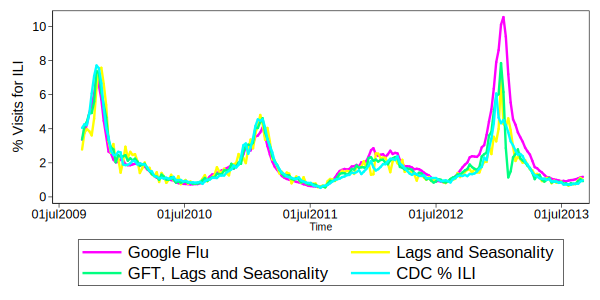

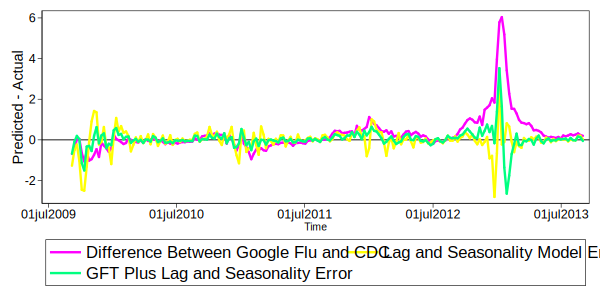

In [106]:
*Fig 1 of manuscript
* Top -- Comparison of GFT; CDC lags and seasonality model (equation 6); CDC, GFT, GFT error and seasonality
* model (equation 9); and the CDC reported %ILI.
twoway (line gflu sweek, lcolor(magenta) lwidth(thick))  ///
(line dlscflu09 sweek, lcolor(yellow) lwidth(thick)) (line degflu09 sweek, lcolor(mint) lwidth(thick)) ///
(line cflu sweek, lcolor(cyan) lwidth(thick))  ///
if _n >= 311, ytitle(% Visits for ILI, size(large))  ///
xtitle(Time) scheme(s1color) xsize(10) ysize(5) xlabel(#6, labsize(medlarge)) ylabel(,labsize(medlarge) angle(horizontal)) legend(size(vlarge))

* Comparison of the proportional errors - (estimate-CDC)/CDC - of all three models
twoway (line dif sweek, lcolor(magenta) lwidth(thick))  ///
(line difdcflu09 sweek, lcolor(yellow) lwidth(thick)) ///
(line difdeflu09 sweek, lcolor(mint) lwidth(thick))  ///
if _n >= 311, ytitle(Predicted - Actual, size(large)) yline(0, lcolor(black)) xtitle(Time) ///
scheme(s1mono) xsize(10) ysize(5) xlabel(#6, labsize(medlarge)) ylabel(,labsize(medlarge) angle(horizontal)) legend(size(vlarge))


![image.png](fig.png)